In [ ]:
# Import Necessary Libraries

from datetime import datetime, timedelta, date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import seaborn as sns
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


# EXPLORATORY ANALYSIS

In [ ]:
# Import data 
import pandas as pd

# Read excel file
df_retail = pd.read_csv('C:/Users/Darius/Desktop/PROJECT//online_retail_II.csv')
print(df_retail.head())
df_retail = df_retail.rename(columns={'Customer ID': 'CustomerID'})

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

        InvoiceDate  Price  CustomerID         Country  
0  01/12/2009 07:45   6.95     13085.0  United Kingdom  
1  01/12/2009 07:45   6.75     13085.0  United Kingdom  
2  01/12/2009 07:45   6.75     13085.0  United Kingdom  
3  01/12/2009 07:45   2.10     13085.0  United Kingdom  
4  01/12/2009 07:45   1.25     13085.0  United Kingdom  


In [ ]:
# Check data info
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   CustomerID   811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [ ]:
# Display the first 5 rows of the 'df_retail' DataFrame
df_retail.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

        InvoiceDate  Price  CustomerID         Country  
0  01/12/2009 07:45   6.95     13085.0  United Kingdom  
1  01/12/2009 07:45   6.75     13085.0  United Kingdom  
2  01/12/2009 07:45   6.75     13085.0  United Kingdom  
3  01/12/2009 07:45   2.10     13085.0  United Kingdom  
4  01/12/2009 07:45   1.25     13085.0  United Kingdom

In [ ]:
# Convert 'InvoiceDate' column to datetime format 
# and display information about the 'df_retail' DataFrame
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1048575 non-null  object        
 1   StockCode    1048575 non-null  object        
 2   Description  1044203 non-null  object        
 3   Quantity     1048575 non-null  int64         
 4   InvoiceDate  1048575 non-null  datetime64[ns]
 5   Price        1048575 non-null  float64       
 6   CustomerID   811893 non-null   float64       
 7   Country      1048575 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 64.0+ MB


In [ ]:
# Extract the year and month from the first entry in the 'InvoiceDate' column of the 'df_retail' DataFrame
df_retail['InvoiceDate'][0].year
df_retail['InvoiceDate'][0].month

1

## How many countries and its distribution in the dataset

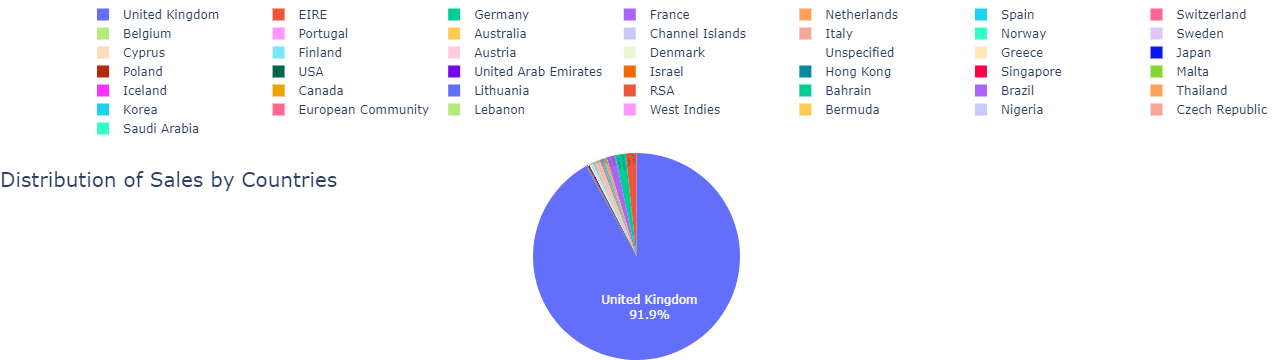

In [ ]:
# Group the data by country and count the occurrences
df_country_counts = df_retail.groupby('Country')['Invoice'].count().reset_index(name='Count')

# Create the pie chart using plotly
fig = px.pie(df_country_counts, values='Count', names='Country', 
             title='Distribution of Countries', hole=.0)

# Customize the layout
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="right", x=1),
                  margin=dict(l=0, r=0, t=10, b=0),
                  title=dict(text='Distribution of Sales by Countries', font=dict(size=20), x=0, y=0.5))
# Display the chart
fig.show()

## Filter data for 01/12/2010 to 01/12/2011 

In [ ]:
# filter the data
start_date = pd.to_datetime('2010-12-01', format='%Y-%m-%d')
end_date = pd.to_datetime('2011-12-01', format='%Y-%m-%d')
df_retail = df_retail[(df_retail['InvoiceDate'] >= start_date) & (df_retail['InvoiceDate'] < end_date)]

In [ ]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500290 entries, 52304 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      500290 non-null  object        
 1   StockCode    500290 non-null  object        
 2   Description  498801 non-null  object        
 3   Quantity     500290 non-null  int64         
 4   InvoiceDate  500290 non-null  datetime64[ns]
 5   Price        500290 non-null  float64       
 6   CustomerID   380365 non-null  float64       
 7   Country      500290 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.4+ MB


In [ ]:
# Create a new column 'InvoiceYearMonth' by applying a lambda function to 'InvoiceDate'
df_retail['InvoiceYearMonth'] = df_retail['InvoiceDate'].map(lambda x: x.year*100 + x.month)

In [ ]:
# Display the first 5 rows of the 'df_retail' DataFrame
df_retail.head(5)

Invoice StockCode                         Description  Quantity  \
52304  494163     22358             KINGS CHOICE TEA CADDY         24   
52305  494163     22357            KINGS CHOICE BISCUIT TIN         8   
52306  494164    84899E  YELLOW + BROWN BEAR FELT PURSE KIT         2   
52307  494164     21335                        LIBRARY LAMP         1   
52308  494165    35001W          HAND OPEN SHAPE DECO.WHITE        72   

              InvoiceDate  Price  CustomerID         Country  InvoiceYearMonth  
52304 2010-12-01 08:59:00   2.55     13433.0  United Kingdom            201012  
52305 2010-12-01 08:59:00   4.25     13433.0  United Kingdom            201012  
52306 2010-12-01 09:24:00   1.25     17961.0  United Kingdom            201012  
52307 2010-12-01 09:24:00  21.95     17961.0  United Kingdom            201012  
52308 2010-12-01 09:25:00   2.95     15380.0  United Kingdom            201012

## Calculate Revenue from UK

In [ ]:
# Calculate monthly revenue by multiplying Quantity and Price
df_retail['Revenue'] = df_retail['Quantity'] * df_retail['Price']

# then grouping by InvoiceYearMonth
df_revenue = df_retail.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()

# Calculate the monthly active customers for the UK
# First, filter the data to include only UK customers
df_uk = df_retail[df_retail['Country'] == 'United Kingdom'].reset_index(drop = True)

## Total Revenue by month in the UK

In [3]:
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Revenue',
    xaxis=dict(
        tickmode='array',
        tickformat='%b',
        tickfont=dict(size=18),
        title=dict(text='Month', font=dict(size=20))
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title=dict(text='Revenue', font=dict(size=20))
    ),
    title=dict(
        text='Monthly Revenue and Total Revenue',
        font=dict(size=24)
    )
)


NameError: name 'fig' is not defined

## Monthly Growth Rate = Tang truong doanh thu thang sau so voi thang truoc


In [14]:
# Monthly Growth Rate
df_revenue['pct_change'] = df_revenue['Revenue'].pct_change()
df_revenue

InvoiceYearMonth      Revenue  pct_change
0             201012   606767.411         NaN
1             201101   607748.110    0.001616
2             201102   542511.540   -0.107341
3             201103   712059.510    0.312524
4             201104   646014.411   -0.092752
5             201105   676018.000    0.046444
6             201106   691023.970    0.022198
7             201107   768815.011    0.112574
8             201108   634214.940   -0.175075
9             201109   960423.922    0.514351
10            201110   931852.160   -0.029749
11            201111  1297606.420    0.392502

In [15]:
import plotly.graph_objs as go
import plotly.offline as pyoff
# Create a line chart showing the monthly growth rate of revenue using Plotly

# Define data for the line chart
plot_data = [
    go.Scatter(
        x=df_revenue[df_revenue['InvoiceYearMonth'] != '2011-12']['InvoiceYearMonth'],
        y=df_revenue[df_revenue['pct_change'] != '2011-12']['pct_change'],
        mode='lines+markers',
        marker=dict(
            color='blue',
            size=14,
            ),
        name='Monthly Growth Rate',
        text=[f'{pct:.2%}' for pct in df_revenue[df_revenue['pct_change'] != '2011-12']['pct_change']], # Add percentage value to text
        textposition='top center',
        textfont=dict(
            size=18,
            ),
        hovertemplate='%{x}<br>Growth Rate: %{y:.2f}%<extra></extra>',
        )
]
# Define the layout for the line chart
plot_layout = go.Layout(
    title='Monthly Growth Rate in 2011',
    xaxis=dict(
        type='category',
        title='Year-Month',
        tickangle=-45,
        tickfont=dict(size=24),
        showticklabels=True,
        ),
    yaxis=dict(
        title='Growth Rate',
        tickformat='.2%',
        tickfont=dict(size=24),
        ),
    font=dict(size=36),
)
# Create the line chart figure
fig = go.Figure(data=plot_data, layout=plot_layout)

# Display the line chart
pyoff.plot(fig)


'temp-plot.html'

## Monthly Active Customers = So luong Customers hoat dong hang thang


In [16]:
# Monthly Active Customers
# Then, group the data by InvoiceYearMonth and count the number of unique CustomerIDs in each group
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
df_monthly_active

InvoiceYearMonth  CustomerID
0             201012         826
1             201101         865
2             201102         771
3             201103         913
4             201104         862
5             201105         899
6             201106         970
7             201107         992
8             201108         863
9             201109        1120
10            201110        1225
11            201111        1408

In [17]:
# Plot Monthly Active User
plot_data = [
    go.Bar(
        x = df_monthly_active['InvoiceYearMonth'],
        y = df_monthly_active['CustomerID'],
    )
]

plot_layout = go.Layout(
    xaxis = {"type" : "category", "title": {"text": "Invoice Year Month", "font": {"size": 28}}, "tickfont": {"size": 24}},
    yaxis = {"title": {"text": "Monthly Active Customers", "font": {"size": 28}}, "tickfont": {"size": 24}},
    title = {"text": "Monthly Active Customers in 2011", "font": {"size": 40}}
)

fig = go.Figure( data = plot_data, layout = plot_layout)
pyoff.plot(fig)


'temp-plot.html'

## Average Quantity of Product sold monthly


In [18]:
# Calculate the total quantity of products sold each month for the UK
df_monthly_sales = df_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
df_monthly_sales.head(5)

InvoiceYearMonth  Quantity
0            201012    233191
1            201101    258882
2            201102    241964
3            201103    318157
4            201104    324958

In [19]:
# Plot Quantity of Product sold monthly
plot_data = [
    go.Bar(
        x=df_monthly_sales['InvoiceYearMonth'],
        y=df_monthly_sales['Quantity'],
    )
]

plot_layout = go.Layout(
    xaxis=dict(
        type="category",
        tickfont=dict(size=28),
        title_font=dict(size=32),
        title="Month"
    ),
    yaxis=dict(
        tickfont=dict(size=28),
        title_font=dict(size=32),
        title="Quantity"
    ),
    title=dict(text="Monthly Total of Order in 2011", font=dict(size=40)),
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [20]:
# Calculate the average monthly sales quantity
df_monthly_sales.mean()

InvoiceYearMonth    201098.166667
Quantity            329783.500000
dtype: float64

## New and Existing Customers


In [21]:
# Determine if each customer is new or existing based on their first purchase date
# Create a DataFrame with the first purchase date for each customer
df_min_purchase = df_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
df_min_purchase.columns = ['CustomerID', 'MinPurchaseDate']
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda x: x.year*100 + x.month)

# Merge the first purchase date DataFrame with the main DataFrame to add UserType column
df_uk = pd.merge(df_uk, df_min_purchase, on='CustomerID')
df_uk['UserType'] = 'New'
df_uk.loc[df_uk['InvoiceYearMonth'] != df_uk['MinPurchaseYearMonth'], 'UserType'] = 'Existing'

# Show the first 10 rows of the modified DataFrame
df_uk.head(10)

Invoice StockCode                         Description  Quantity  \
0  494163     22358             KINGS CHOICE TEA CADDY         24   
1  494163     22357            KINGS CHOICE BISCUIT TIN         8   
2  494164    84899E  YELLOW + BROWN BEAR FELT PURSE KIT         2   
3  494164     21335                        LIBRARY LAMP         1   
4  494230     48138                 DOOR MAT UNION FLAG         1   
5  494230     21252      SET OF MEADOW  FLOWER STICKERS         2   
6  494230    47591D       PINK FAIRY CAKE CHILD'S APRON         1   
7  494230     21527      RETRO SPOT TRADITIONAL TEAPOT          1   
8  494230     37449  CERAMIC CAKE STAND + HANGING CAKES         1   
9  539663     84006           MAGIC TREE -PAPER FLOWERS         2   

          InvoiceDate  Price  CustomerID         Country  InvoiceYearMonth  \
0 2010-12-01 08:59:00   2.55     13433.0  United Kingdom            201012   
1 2010-12-01 08:59:00   4.25     13433.0  United Kingdom            201012   
2 2010-12-01 09:24:00   1.25     17961.0  United Kingdom            201012   
3 2010-12-01 09:24:00  21.95     17961.0  United Kingdom            201012   
4 2010-12-01 14:08:00   6.75     17961.0  United Kingdom            201012   
5 2010-12-01 14:08:00   2.95     17961.0  United Kingdom            201012   
6 2010-12-01 14:08:00   1.95     17961.0  United Kingdom            201012   
7 2010-12-01 14:08:00   7.95     17961.0  United Kingdom            201012   
8 2010-12-01 14:08:00   9.95     17961.0  United Kingdom            201012   
9 2010-12-21 10:26:00   0.85     17961.0  United Kingdom            201012   

   Revenue     MinPurchaseDate  MinPurchaseYearMonth UserType  
0    61.20 2010-12-01 08:59:00                201012      New  
1    34.00 2010-12-01 08:59:00                201012      New  
2     2.50 2010-12-01 09:24:00                201012      New  
3    21.95 2010-12-01 09:24:00                201012      New  
4     6.75 2010-12-01 09:24:00                201012      New  
5     5.90 2010-12-01 09:24:00                201012      New  
6     1.95 2010-12-01 09:24:00                201012      New  
7     7.95 2010-12-01 09:24:00                201012      New  
8     9.95 2010-12-01 09:24:00                201012      New  
9     1.70 2010-12-01 09:24:00                201012      New

In [22]:
# Count User's type
df_uk['UserType'].value_counts()

Existing    243202
New          95027
Name: UserType, dtype: int64

In [23]:
# Group the df_uk DataFrame by 'InvoiceYearMonth' and 'UserType' columns, and sum up the 'Revenue' column for each group
df_user_type_revenue = df_uk.groupby(['InvoiceYearMonth', 'UserType'])['Revenue'].sum().reset_index()

# Remove the rows with the InvoiceYearMonth of 201012 and 201112
df_user_type_revenue = df_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

# Display the first 5 rows of the resulting DataFrame
df_user_type_revenue.head(5)

InvoiceYearMonth  UserType    Revenue
1            201101  Existing  174982.39
2            201101       New  198591.84
3            201102  Existing  250356.14
4            201102       New  140289.97
5            201103  Existing  363814.83

In [24]:
# Plot graph
plot_data = [
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'],
        y=df_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        name='Existing'),
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'],
        y=df_user_type_revenue.query("UserType == 'New'")['Revenue'],
        name='New'),
]

plot_layout = go.Layout(
    xaxis=dict(
        type="category",
        tickfont=dict(size=28),
        title_font=dict(size=32),
        title="Month"
    ),
    yaxis=dict(
        tickfont=dict(size=28),
        title_font=dict(size=32),
        title="Revenue"
    ),
    title=dict(text="Revenue of New and Existing Customers in 2011", font=dict(size=40)),
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

## Monthly New Customer Ratio


In [25]:
# Monthly New Customers
# Select only the rows where the UserType is 'New' and group them by the InvoiceYearMonth column
countNew = df_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

#Select only the rows where the UserType is 'Existing' and group them by the InvoiceYearMonth column
countExisting = df_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

#Calculate the ratio of new customers to existing customers for each month
df_user_ratio = countNew / countExisting

In [26]:
# Visualization Monthly New Customers
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio = df_user_ratio.dropna()

plot_data = [
    go.Bar(
        x=df_user_ratio['InvoiceYearMonth'],
        y=df_user_ratio['CustomerID'],
    )
]

plot_layout = go.Layout(
    xaxis=dict(
        type="category",
        tickfont=dict(size=28),
        title_font=dict(size=32),
        title="Month"
    ),
    yaxis=dict(
        tickfont=dict(size=28),
        title_font=dict(size=32),
        title="Ratio"
    ),
    title=dict(text="New Customer Ratio in 2011", font=dict(size=40)),
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

## Monthly Retention Rate


In [27]:
# Add a new column to the df_uk dataframe which contains the year and month of each invoice
df_uk['InvoiceYearMonth'] = df_uk['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_uk.head(5)

# Monthly Active

# Group the df_uk dataframe by InvoiceYearMonth and count the number of unique CustomerIDs
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

# Group the df_uk dataframe by CustomerID and InvoiceYearMonth and sum the Revenue column
df_user_purchase = df_uk.groupby(['CustomerID',
                                  'InvoiceYearMonth'])['Revenue'].sum().astype(int).reset_index()

In [28]:
# Create the Retention crosstab
df_retention = pd.crosstab(df_user_purchase['CustomerID'], 
                           df_user_purchase['InvoiceYearMonth']).reset_index()
df_retention.head()

InvoiceYearMonth  CustomerID  201012  201101  201102  201103  201104  201105  \
0                    12346.0       0       1       0       0       0       0   
1                    12747.0       1       1       0       0       1       1   
2                    12748.0       1       1       1       1       1       1   
3                    12749.0       0       1       0       0       0       1   
4                    12820.0       0       1       0       0       0       0   

InvoiceYearMonth  201106  201107  201108  201109  201110  201111  
0                      0       0       0       0       0       0  
1                      1       0       1       0       0       1  
2                      1       1       1       1       1       1  
3                      0       0       1       0       1       1  
4                      0       0       0       1       1       0

In [29]:
# Loc from 01/2011 to 12/2011
months = df_retention.columns[2:]

#Calculate total customers of 01/2011
df_retention[201101].sum()

# Initialize an empty list to store the retention data for each month
retention_array = []

# Loop through each month except for the last one in the months list
# For each month, calculate the retention rate compared to the previous month

for i in range(len(months)-1):
    #Create a dictionary to store the retention data for the selected month
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]==1 
                                                        & (df_retention[prev_month]==1))][selected_month].sum()
    retention_array.append(retention_data)
    print("***************" + str(selected_month) + "***************")
    print(retention_array)
    
# Create a new dataframe from the retention array
df_retention = pd.DataFrame(retention_array)

# Display the dataframe
df_retention

# Monthly Customer Retention Rate
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']
df_retention

***************201102***************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 771, 'RetainedUserCount': 288}]
***************201103***************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 771, 'RetainedUserCount': 288}, {'InvoiceYearMonth': 201103, 'TotalUserCount': 913, 'RetainedUserCount': 294}]
***************201104***************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 771, 'RetainedUserCount': 288}, {'InvoiceYearMonth': 201103, 'TotalUserCount': 913, 'RetainedUserCount': 294}, {'InvoiceYearMonth': 201104, 'TotalUserCount': 862, 'RetainedUserCount': 317}]
***************201105***************
[{'InvoiceYearMonth': 201102, 'TotalUserCount': 771, 'RetainedUserCount': 288}, {'InvoiceYearMonth': 201103, 'TotalUserCount': 913, 'RetainedUserCount': 294}, {'InvoiceYearMonth': 201104, 'TotalUserCount': 862, 'RetainedUserCount': 317}, {'InvoiceYearMonth': 201105, 'TotalUserCount': 899, 'RetainedUserCount': 345}]
***************201106***************
[{'InvoiceYearMonth':

InvoiceYearMonth  TotalUserCount  RetainedUserCount  RetentionRate
0            201102             771                288       0.373541
1            201103             913                294       0.322015
2            201104             862                317       0.367749
3            201105             899                345       0.383760
4            201106             970                356       0.367010
5            201107             992                393       0.396169
6            201108             863                387       0.448436
7            201109            1120                362       0.323214
8            201110            1225                461       0.376327
9            201111            1408                565       0.401278

### Monthly Retention Rate Plot

In [30]:
# Visualization Monthly Customer Retention Rate
plot_data = [
    go.Scatter(
        x=df_retention['InvoiceYearMonth'],
        y=df_retention['RetentionRate'],
        name='Organic'
    )
]

plot_layout = go.Layout(
    xaxis=dict(
        type="category",
        tickfont=dict(size=28),
        title_font=dict(size=32),
        title="Month"
    ),
    yaxis=dict(
        tickfont=dict(size=28),
        title_font=dict(size=32),
        title="Retention Rate"
    ),
    title=dict(text="Monthly Customer Retention Rate in 2011", font=dict(size=40)),
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

## Cohort Analysis



### Cohort Base Retention

In [31]:
# Cohort Base Retention
df_min_purchase['MinPurchaseYearMonth'] =df_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year +date.month)

In [32]:
#crosstab 
df_retention = pd.crosstab(df_user_purchase['CustomerID'], df_user_purchase['InvoiceYearMonth']).reset_index()
#merge table
df_retention = pd.merge(df_retention, df_min_purchase [['CustomerID', 'MinPurchaseYearMonth']], on ='CustomerID', how='left')

In [33]:
# Rename the columns of the df_retention dataframe to have a prefix of "m_" before each month
new_column_names = ['m_' + str(column) for column in df_retention.columns[:-1]]

# This is done to distinguish the monthly columns from the minimum purchase month column
new_column_names.append('MinPurchaseYearMonth')
df_retention.columns = new_column_names

# Display the dataframe with the renamed columns
df_retention

m_CustomerID  m_201012  m_201101  m_201102  m_201103  m_201104  \
0          12346.0         0         1         0         0         0   
1          12747.0         1         1         0         0         1   
2          12748.0         1         1         1         1         1   
3          12749.0         0         1         0         0         0   
4          12820.0         0         1         0         0         0   
...            ...       ...       ...       ...       ...       ...   
3919       18278.0         0         0         0         0         0   
3920       18280.0         0         0         0         0         0   
3921       18282.0         0         0         1         0         0   
3922       18283.0         0         1         1         0         1   
3923       18287.0         0         0         0         0         0   

      m_201105  m_201106  m_201107  m_201108  m_201109  m_201110  m_201111  \
0            0         0         0         0         0         0         0   
1            1         1         0         1         0         0         1   
2            1         1         1         1         1         1         1   
3            1         0         0         1         0         1         1   
4            0         0         0         0         1         1         0   
...        ...       ...       ...       ...       ...       ...       ...   
3919         0         0         0         0         1         0         0   
3920         0         0         1         0         0         0         0   
3921         1         0         0         0         1         0         0   
3922         1         1         1         0         0         1         1   
3923         1         0         0         0         0         1         0   

      MinPurchaseYearMonth  
0                   201101  
1                   201012  
2                   201012  
3                   201101  
4                   201101  
...                    ...  
3919                201109  
3920                201107  
3921                201102  
3922                201101  
3923                201105  

[3924 rows x 14 columns]

In [34]:
# Cohort Base Retention 
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] =np.nan
        
    total_user_count = df_retention[df_retention.MinPurchaseYearMonth == selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] =1
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    
    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' +str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(new_query)['m_' +str(next_month)].sum()/total_user_count,2)
        
    retention_array.append(retention_data)
    
df_retention = pd.DataFrame(retention_array)
    

####   Cohort Analysis Base Retention Plot

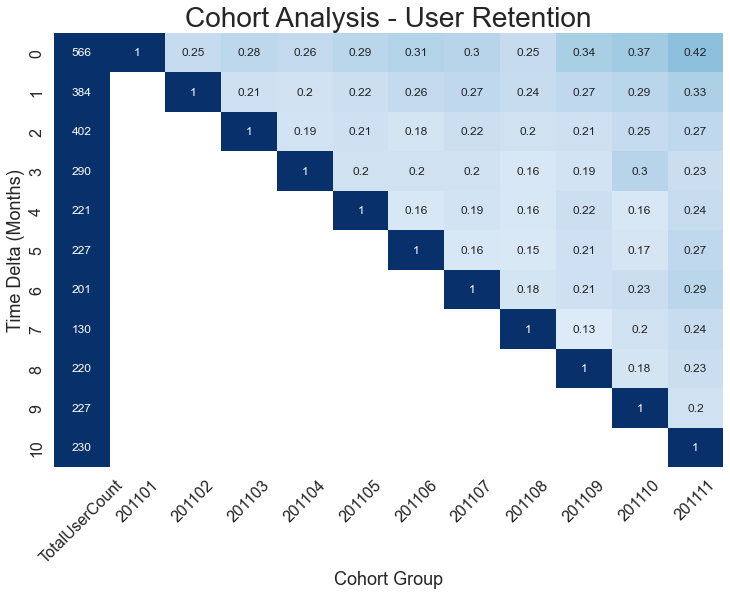

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the dataframe
df_retention = df_retention

# Calculate the total user count
df_retention['Total'] = df_retention.sum(axis=1)

# Plot the cohort chart
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis - User Retention', fontsize=28)
ax = sns.heatmap(df_retention.iloc[:, :-1], annot=True, cmap='Blues', fmt='g', vmin=0.0, vmax=1.0, cbar=False)
plt.xlabel('Cohort Group', fontsize=18)
plt.ylabel('Time Delta (Months)', fontsize=18)

# Rotate the x-axis labels by 45 degrees
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)

plt.savefig('Cohort.png', dpi=300)
plt.show()


# CUSTOMER SEGMENTATION

In [36]:
# Import necessary modules

from datetime import datetime, timedelta, date
from __future__ import division
from sklearn.cluster import KMeans

In [37]:
# Convert 'InvoiceDate' column to datetime format and extract date component
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate']).dt.date

# Display first few rows of the modified DataFrame
df_uk.head()

Invoice StockCode                         Description  Quantity InvoiceDate  \
0  494163     22358             KINGS CHOICE TEA CADDY         24  2010-12-01   
1  494163     22357            KINGS CHOICE BISCUIT TIN         8  2010-12-01   
2  494164    84899E  YELLOW + BROWN BEAR FELT PURSE KIT         2  2010-12-01   
3  494164     21335                        LIBRARY LAMP         1  2010-12-01   
4  494230     48138                 DOOR MAT UNION FLAG         1  2010-12-01   

   Price  CustomerID         Country  InvoiceYearMonth  Revenue  \
0   2.55     13433.0  United Kingdom            201012    61.20   
1   4.25     13433.0  United Kingdom            201012    34.00   
2   1.25     17961.0  United Kingdom            201012     2.50   
3  21.95     17961.0  United Kingdom            201012    21.95   
4   6.75     17961.0  United Kingdom            201012     6.75   

      MinPurchaseDate  MinPurchaseYearMonth UserType  
0 2010-12-01 08:59:00                201012      New  
1 2010-12-01 08:59:00                201012      New  
2 2010-12-01 09:24:00                201012      New  
3 2010-12-01 09:24:00                201012      New  
4 2010-12-01 09:24:00                201012      New

## RECENCY

In [38]:
# RECENCY QUATER  2 /2011 (03/2011 - 06/2011)
# filter 3 months
# Select orders made between 03/2011 and 06/2011
df_q2 = df_uk[(df_uk.InvoiceDate < date(2011,6,1)) & (df_uk.InvoiceDate >= date(2011,3,1))].reset_index()

# Create a DataFrame of unique customer IDs
df_uk_user_q2 = pd.DataFrame(df_q2['CustomerID'].unique())
df_uk_user_q2.columns = ['CustomerID']

# Calculate the most recent purchase date for each customer in the selected time period
df_max_purchase = df_q2.groupby('CustomerID').InvoiceDate.max().reset_index()
df_max_purchase.columns = ['CustomerID', 'MaxPurchaseDate']

# Calculate the number of days between each customer's most recent purchase and the end of the selected time period
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days

# Display the first few rows of the modified DataFrame
df_max_purchase.head()

CustomerID MaxPurchaseDate  Recency
0     12747.0      2011-05-25        6
1     12748.0      2011-05-31        0
2     12749.0      2011-05-23        8
3     12823.0      2011-04-08       53
4     12827.0      2011-04-12       49

In [39]:
# Calculate Frequency (count how many times a customer made purchases)
df_frequency = df_q2.groupby('CustomerID').InvoiceDate.count().reset_index()
df_frequency.columns = ['CustomerID', 'Frequency']

# Merge Frequency to df_uk_user_q2
df_uk_user_q2 = pd.merge(df_uk_user_q2, df_frequency, on='CustomerID', how='left')

# Calculate revenue and merge it to the customer dataset
df_q2['Revenue'] = df_q2['Price'] * df_q2['Quantity']
df_revenue = df_q2.groupby('CustomerID').Revenue.sum().reset_index()
df_uk_user_q2 = pd.merge(df_uk_user_q2, df_revenue, on='CustomerID', how='left')

# Remove outliers with Frequency=1664 and Revenue=78414.180000
df_uk_user_q2 = df_uk_user_q2[(df_uk_user_q2['Frequency'] != 1664) & (df_uk_user_q2['Revenue'] != 78414.180000)]

# Show the resulting dataframe
df_uk_user_q2


CustomerID  Frequency  Revenue
0        17961.0         58   228.29
1        14867.0         16   313.40
2        16841.0         17   308.76
3        14239.0         22   297.26
4        15299.0          5  2065.99
...          ...        ...      ...
1835     17084.0        162  2949.75
1836     14354.0          3    75.84
1837     13596.0         18   285.44
1838     13153.0         15   486.22
1839     15773.0         10   635.68

[1839 rows x 3 columns]

In [40]:
# Merge df_uk_user_q2 to df_max_purchase on CustomerID
df_uk_user_q2 = pd.merge(df_uk_user_q2, df_max_purchase[['CustomerID', 'Recency']], on = 'CustomerID')

# Display the first few rows of the modified DataFrame
df_uk_user_q2.head()

CustomerID  Frequency  Revenue  Recency
0     17961.0         58   228.29        4
1     14867.0         16   313.40       26
2     16841.0         17   308.76       81
3     14239.0         22   297.26        8
4     15299.0          5  2065.99       47

In [41]:
# Calculate summary statistics for the Recency column of df_uk_user_q2
df_uk_user_q2.Recency.describe()

count    1839.000000
mean       36.877651
std        26.264904
min         0.000000
25%        12.000000
50%        33.000000
75%        57.000000
max        90.000000
Name: Recency, dtype: float64

### Recency KMeans (result k = 4)


In [42]:
# Import necessary modules
import plotly.graph_objs as go
import plotly.offline as pyoff
from sklearn.cluster import KMeans

# Initialize an empty list of SSE values
sse = [0] * 10
# Extract the Recency column from the df_uk_user_q2 DataFrame
df_recency = df_uk_user_q2[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

# Create a scatter plot of SSE values for each k
plot_data = [ 
    go.Scatter(
        x = list(range(2, 10)),
        y = sse[1:10],
        line=dict(width=3.6) # set line width to 3.6
    )
]
# Set the plot layout
plot_layout = go.Layout(
    title = {
        'text': 'Number of Clusters of Recency in q2',
        'font': {'size': 38}
    },
    xaxis = {
        'title': {
            'text': 'Number of clusters',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    },
    yaxis = {
        'title': {
            'text': 'SSE',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    }
)
# Create the plot figure
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\Darius\AppData\Local\Temp\ipykernel_14036\1220075615.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 

'temp-plot.html'

### Silhoutte Score for Recency

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=2: 0.6750292957431719


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=3: 0.6452759317025725


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=4: 0.6322890569680856


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=5: 0.6296566335329135


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=6: 0.6094857719925881


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=7: 0.6107594562273491


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=8: 0.6177451492461083


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=9: 0.6390962716570555


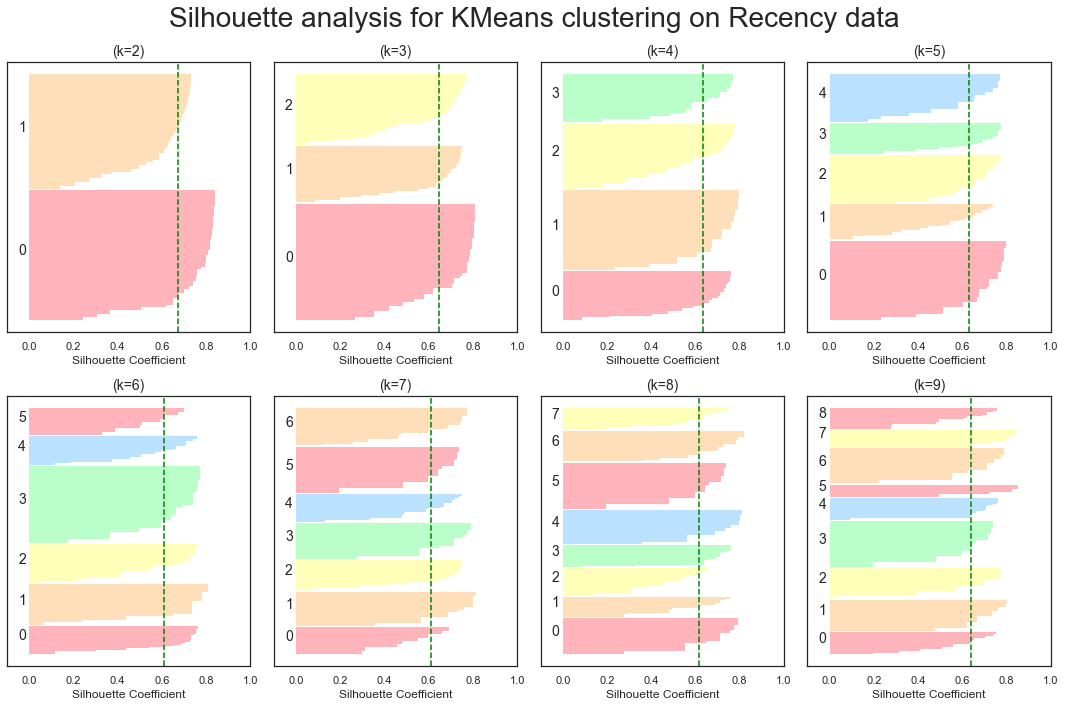

In [43]:
# Import necessary modules
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
# Define a list of custom colors
custom_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#ffb3ba', '#ffdfba', '#ffffba']
# Extract the Recency column from the df_uk_user_q2 DataFrame
df_recency = df_uk_user_q2[['Recency']]
range_n_clusters = range(2, 10)
# Create a subplot for each k value
fig, ax = plt.subplots(2, 4, figsize=(15,10))
# Create empty list to store silhouette scores for each k value
silhouette_scores = []
for i, n_clusters in enumerate(range_n_clusters):
    # Initialize KMeans and fit the data
    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000).fit(df_recency)
    cluster_labels = kmeans.labels_

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(df_recency, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_recency, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Silhouette score for k={n_clusters}: {silhouette_avg}")
    # Plot silhouette diagram
    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_jth_cluster = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_jth_cluster

        color = custom_colors[j % len(custom_colors)]

        ax[i//4, i%4].barh(
            range(y_lower, y_upper),
            jth_cluster_silhouette_values,
            height=1.0,
            edgecolor='none',
            color=color
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax[i//4, i%4].text(-0.05, y_lower + 0.5 * size_jth_cluster, str(j), fontsize=14)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    # Plot the mean silhouette coefficient for all clusters
    ax[i//4, i%4].axvline(x=silhouette_avg, color="green", linestyle="--")
    ax[i//4, i%4].set_yticks([])  # Clear the yaxis labels / ticks
    ax[i//4, i%4].set_xlim([-0.1, 1])
    ax[i//4, i%4].set_xlabel("Silhouette Coefficient", fontsize=12)
    ax[i//4, i%4].set_title(f"(k={n_clusters})", fontsize=14)
# Set the main title of the plot
fig.suptitle("Silhouette analysis for KMeans clustering on Recency data", fontsize=28)
plt.tight_layout()
plt.show()

In [44]:
# Set the number of clusters to 4
kmeans = KMeans(n_clusters= 4)

# Fit the K-Means model to the Recency column of the df_uk_user_q2 DataFrame
kmeans.fit(df_uk_user_q2[['Recency']])

# Use the K-Means model to predict the cluster labels for each customer based on Recency
df_uk_user_q2['RecencyCluster'] = kmeans.predict(df_uk_user_q2[["Recency"]])

# Display the head of the df_uk_user_q2 DataFrame to verify the cluster assignments
df_uk_user_q2.head()

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



CustomerID  Frequency  Revenue  Recency  RecencyCluster
0     17961.0         58   228.29        4               1
1     14867.0         16   313.40       26               3
2     16841.0         17   308.76       81               2
3     14239.0         22   297.26        8               1
4     15299.0          5  2065.99       47               0

In [45]:
# Group the customers by RecencyCluster and display the descriptive statistics for the Recency column
df_uk_user_q2.groupby('RecencyCluster')['Recency'].describe()

count       mean       std   min   25%   50%   75%   max
RecencyCluster                                                          
0               495.0  50.228283  6.674807  40.0  44.0  50.0  56.0  63.0
1               607.0   8.515651  4.387877   0.0   5.0   8.0  12.0  16.0
2               370.0  76.537838  7.675670  64.0  69.0  76.0  82.0  90.0
3               367.0  25.795640  4.948277  18.0  22.0  25.0  30.0  35.0

In [46]:
df_uk_user_q2

CustomerID  Frequency  Revenue  Recency  RecencyCluster
0        17961.0         58   228.29        4               1
1        14867.0         16   313.40       26               3
2        16841.0         17   308.76       81               2
3        14239.0         22   297.26        8               1
4        15299.0          5  2065.99       47               0
...          ...        ...      ...      ...             ...
1834     17084.0        162  2949.75       50               0
1835     14354.0          3    75.84       49               0
1836     13596.0         18   285.44       49               0
1837     13153.0         15   486.22       49               0
1838     15773.0         10   635.68       49               0

[1839 rows x 5 columns]

### Rearange Recency Cluster

In [47]:
# mean cluster 2 < cluster 3 < cluster 0 < cluster 1, so we need to arrange it in the order
# recency as small as the big of cluster number
# reorder

df_new = df_uk_user_q2.groupby('RecencyCluster')['Recency'].mean().reset_index()

In [48]:
df_new

RecencyCluster    Recency
0               0  50.228283
1               1   8.515651
2               2  76.537838
3               3  25.795640

In [49]:
# Sort the df_new DataFrame by Recency in descending order and reset the index
df_new = df_new.sort_values(by="Recency", ascending=False).reset_index(drop=True)

# Add a new column called "index" to df_new that contains the sorted index values
df_new['index'] = df_new.index

# Display the updated df_new DataFrame
df_new

RecencyCluster    Recency  index
0               2  76.537838      0
1               0  50.228283      1
2               3  25.795640      2
3               1   8.515651      3

In [50]:
# Merge the df_uk_user_q2 DataFrame with df_new on the RecencyCluster column, adding the index column from df_new to df_uk_user_q2_recency
df_uk_user_q2_recency = pd.merge(df_uk_user_q2, df_new[['RecencyCluster', 'index']], on='RecencyCluster', how='left')

# Display the updated df_uk_user_q2_recency DataFrame
df_uk_user_q2_recency

CustomerID  Frequency  Revenue  Recency  RecencyCluster  index
0        17961.0         58   228.29        4               1      3
1        14867.0         16   313.40       26               3      2
2        16841.0         17   308.76       81               2      0
3        14239.0         22   297.26        8               1      3
4        15299.0          5  2065.99       47               0      1
...          ...        ...      ...      ...             ...    ...
1834     17084.0        162  2949.75       50               0      1
1835     14354.0          3    75.84       49               0      1
1836     13596.0         18   285.44       49               0      1
1837     13153.0         15   486.22       49               0      1
1838     15773.0         10   635.68       49               0      1

[1839 rows x 6 columns]

In [51]:
#drop column 'RecencyCluster'
df_uk_user_q2_recency = df_uk_user_q2_recency.drop(['RecencyCluster'], axis = 1)

In [52]:
df_uk_user_q2_recency.head()

CustomerID  Frequency  Revenue  Recency  index
0     17961.0         58   228.29        4      3
1     14867.0         16   313.40       26      2
2     16841.0         17   308.76       81      0
3     14239.0         22   297.26        8      3
4     15299.0          5  2065.99       47      1

In [53]:
# Rename column 'index' to 'RecencyCluster' and sort value of this descending
df_uk_user_q2_recency = df_uk_user_q2_recency.rename(columns = {"index" : "RecencyCluster"})
df_uk_user_q2_recency.sort_values('RecencyCluster', ascending = False)

CustomerID  Frequency  Revenue  Recency  RecencyCluster
0        17961.0         58   228.29        4               3
1513     17047.0         43   749.43       13               3
1555     15292.0         25   180.94        9               3
602      16912.0         49  1264.84        8               3
603      14895.0         64  1573.44       12               3
...          ...        ...      ...      ...             ...
584      16997.0          4    78.00       90               0
1009     14066.0          7   152.55       74               0
1007     16256.0         14   732.63       65               0
594      15606.0          8   310.80       69               0
919      13026.0          1   159.36       87               0

[1839 rows x 5 columns]

In [54]:
# update df_uk_user_q2
df_uk_user_q2 = df_uk_user_q2_recency
df_uk_user_q2.sort_values('RecencyCluster', ascending = False)

CustomerID  Frequency  Revenue  Recency  RecencyCluster
0        17961.0         58   228.29        4               3
1513     17047.0         43   749.43       13               3
1555     15292.0         25   180.94        9               3
602      16912.0         49  1264.84        8               3
603      14895.0         64  1573.44       12               3
...          ...        ...      ...      ...             ...
584      16997.0          4    78.00       90               0
1009     14066.0          7   152.55       74               0
1007     16256.0         14   732.63       65               0
594      15606.0          8   310.80       69               0
919      13026.0          1   159.36       87               0

[1839 rows x 5 columns]

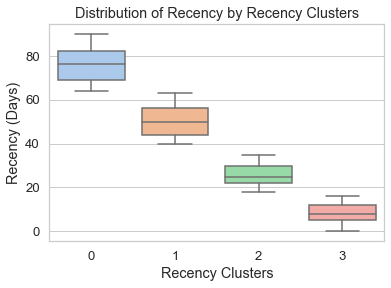

In [55]:
# Plot a boxplot of RecencyCluster grouped by the 4 clusters
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.boxplot(x="RecencyCluster", y="Recency", data=df_uk_user_q2, palette="pastel")

# Add titles and labels
ax.set_title("Distribution of Recency by Recency Clusters")
ax.set_xlabel("Recency Clusters")
ax.set_ylabel("Recency (Days)")

# Save the figure
plt.savefig("recency_boxplot.png", dpi=300)


## FREQUENCY

In [56]:
# Describe Frequency
df_uk_user_q2.Frequency.describe()

count    1839.000000
mean       39.034802
std        54.108643
min         1.000000
25%        11.000000
50%        24.000000
75%        46.000000
max       627.000000
Name: Frequency, dtype: float64

In [57]:
# Plot Frequency Distribution

import plotly.graph_objs as go
from plotly.offline import plot

# create a histogram trace with custom styling
hist_trace = go.Histogram(
    x=df_uk_user_q2.query('Frequency < 200')["Frequency"],
    marker=dict(color='#1f77b4')
)

# create a plot layout with custom styling
plot_layout = go.Layout(
    title='Distribution of Frequency in q2',
    xaxis=dict(title='Frequency'),
    yaxis=dict(title='Count'),
    plot_bgcolor='#f7f7f7',
    margin=dict(l=50, r=50, t=50, b=50)
)

# create a plot figure and update its layout and traces
fig = go.Figure(data=[hist_trace], layout=plot_layout)

# customize the histogram trace and update the plot figure
fig.update_traces(
    opacity=0.8,
    marker=dict(line=dict(color='#ffffff', width=1))
)

# update the plot layout with additional customizations
fig.update_layout(
    font=dict(family='Arial', size=24),
    title=dict(x=0.5),
    hovermode='x',
    bargap=0.2
)

# show the plot
plot(fig)


'temp-plot.html'

### Frequency Kmeans (Result k =3)

In [58]:
# Import necessary modules
import plotly.graph_objs as go
import plotly.offline as pyoff
from sklearn.cluster import KMeans
# Initialize an empty list of SSE values
sse = [0] * 10

# Extract the Recency column from the df_uk_user_q2 DataFrame
df_frequency = df_uk_user_q2[['Frequency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_frequency)
    df_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

# Create a scatter plot of SSE values for each k
plot_data = [ 
    go.Scatter(
        x = list(range(2, 10)),
        y = sse[1:10],
        line=dict(width=3.6) # set line width to 3.6
    )
]
# Set the plot layout
plot_layout = go.Layout(
    title = {
        'text': 'Number of Clusters of Frequency in q2',
        'font': {'size': 38}
    },
    xaxis = {
        'title': {
            'text': 'Number of clusters',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    },
    yaxis = {
        'title': {
            'text': 'SSE',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    }
)
# Create the plot figure
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\Darius\AppData\Local\Temp\ipykernel_14036\1042076668.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 

'temp-plot.html'

### Silhoutte Score for Frequency

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=2: 0.8018567288164994


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=3: 0.7170071615504259


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=4: 0.6451281267462519


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=5: 0.6129478976646058


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=6: 0.5804845785241832


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=7: 0.5749936171395857


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=8: 0.5753112448018285


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=9: 0.5656164742192037


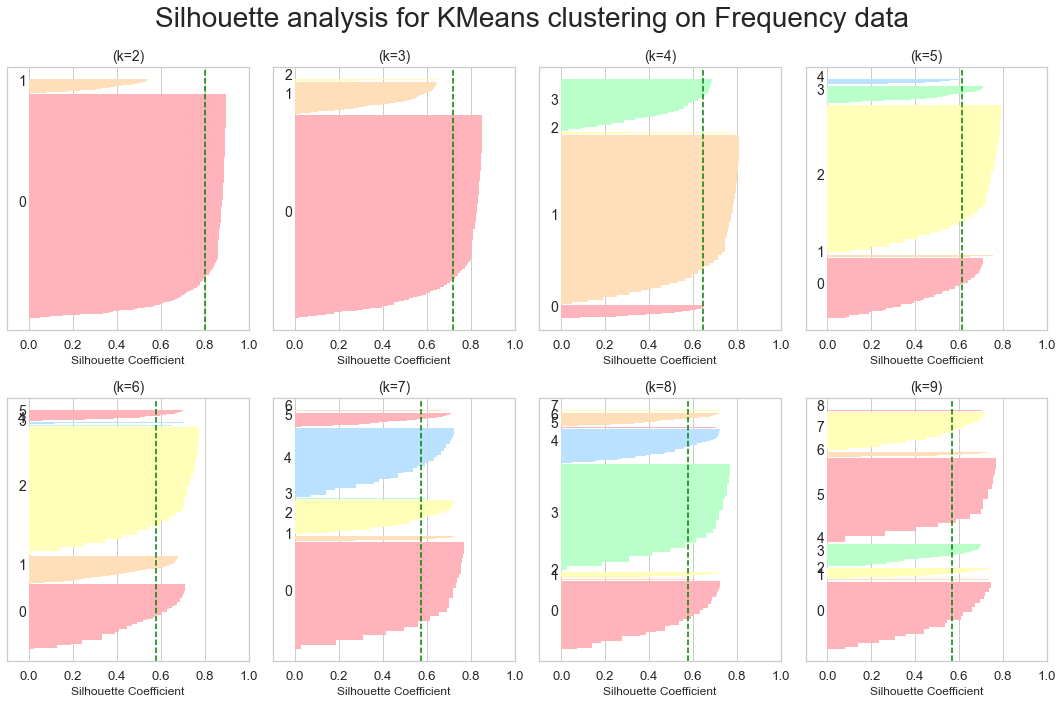

In [59]:
# Import necessary modules
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Define a list of custom colors
custom_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#ffb3ba', '#ffdfba', '#ffffba']

# Extract the Recency column from the df_uk_user_q2 DataFrame
df_frequency = df_uk_user_q2[['Frequency']]

range_n_clusters = range(2, 10)

# Create empty list to store silhouette scores for each k value
silhouette_scores = []

# Create a subplot for each k value
fig, ax = plt.subplots(2, 4, figsize=(15,10))

for i, n_clusters in enumerate(range_n_clusters):
    # Initialize KMeans and fit the data
    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000).fit(df_frequency)
    cluster_labels = kmeans.labels_

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(df_frequency, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_frequency, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Silhouette score for k={n_clusters}: {silhouette_avg}")  
    # Plot silhouette diagram
    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_jth_cluster = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_jth_cluster

        color = custom_colors[j % len(custom_colors)]

        ax[i//4, i%4].barh(
            range(y_lower, y_upper),
            jth_cluster_silhouette_values,
            height=1.0,
            edgecolor='none',
            color=color
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax[i//4, i%4].text(-0.05, y_lower + 0.5 * size_jth_cluster, str(j), fontsize=14)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    # Plot the mean silhouette coefficient for all clusters
    ax[i//4, i%4].axvline(x=silhouette_avg, color="green", linestyle="--")
    ax[i//4, i%4].set_yticks([])  # Clear the yaxis labels / ticks
    ax[i//4, i%4].set_xlim([-0.1, 1])
    ax[i//4, i%4].set_xlabel("Silhouette Coefficient", fontsize=12)
    ax[i//4, i%4].set_title(f"(k={n_clusters})", fontsize=14)

# Set the main title of the plot
fig.suptitle("Silhouette analysis for KMeans clustering on Frequency data", fontsize=28)

plt.tight_layout()
plt.show()

In [60]:
#choose K = 3 for Frequency Clusterings
kmeans = KMeans(n_clusters= 3)
kmeans.fit(df_uk_user_q2[['Frequency']])
df_uk_user_q2['FrequencyCluster'] =kmeans.predict(df_uk_user_q2[["Frequency"]])
df_uk_user_q2.head()

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



CustomerID  Frequency  Revenue  Recency  RecencyCluster  FrequencyCluster
0     17961.0         58   228.29        4               3                 0
1     14867.0         16   313.40       26               2                 0
2     16841.0         17   308.76       81               0                 0
3     14239.0         22   297.26        8               3                 0
4     15299.0          5  2065.99       47               1                 0

In [61]:
# Check frequency order
df_uk_user_q2.groupby('FrequencyCluster')['Frequency'].describe()

count        mean         std    min    25%    50%    75%  \
FrequencyCluster                                                               
0                 1573.0   23.152575   17.065198    1.0    9.0   20.0   34.0   
1                  247.0  111.570850   39.915078   68.0   78.0  100.0  132.0   
2                   19.0  410.947368  107.248141  279.0  299.5  428.0  470.0   

                    max  
FrequencyCluster         
0                  67.0  
1                 253.0  
2                 627.0

In [62]:
# Because 0<1<2 and 23<111<410, so we dont need to rearrange clusters

### Plot Boxplot of FrequencyClusters

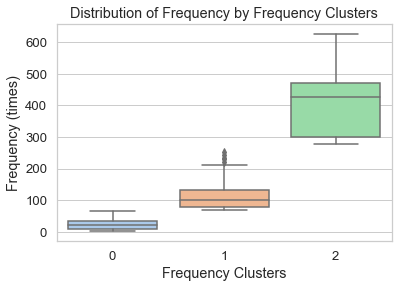

In [63]:
# Plot a boxplot of FrequencyCluster grouped by the 3 clusters
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.boxplot(x="FrequencyCluster", y="Frequency", data=df_uk_user_q2, palette="pastel")
# Add titles and labels
ax.set_title("Distribution of Frequency by Frequency Clusters")
ax.set_xlabel("Frequency Clusters")
ax.set_ylabel("Frequency (times)")

# Save the figure
plt.savefig("frequency_boxplot.png", dpi=300)

In [64]:
df_uk_user_q2

CustomerID  Frequency  Revenue  Recency  RecencyCluster  \
0        17961.0         58   228.29        4               3   
1        14867.0         16   313.40       26               2   
2        16841.0         17   308.76       81               0   
3        14239.0         22   297.26        8               3   
4        15299.0          5  2065.99       47               1   
...          ...        ...      ...      ...             ...   
1834     17084.0        162  2949.75       50               1   
1835     14354.0          3    75.84       49               1   
1836     13596.0         18   285.44       49               1   
1837     13153.0         15   486.22       49               1   
1838     15773.0         10   635.68       49               1   

      FrequencyCluster  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1834                 1  
1835                 0  
1836                 0  
1837                 0  
1838                 0  

[1839 rows x 6 columns]

## MONETARY (REVENUE)

In [65]:
# Remove outliers with Frequency=1664 and Revenue=78414.180000
df_uk_user_q2 = df_uk_user_q2[(df_uk_user_q2['Frequency'] != 1664) & (df_uk_user_q2['Revenue'] != 78414.180000)]

# MONETARY VALUE in Quarter 2 /2011
# Calculate Monetary Value
df_uk_user_q2.describe()


CustomerID    Frequency       Revenue      Recency  RecencyCluster  \
count   1839.000000  1839.000000   1839.000000  1839.000000     1839.000000   
mean   15541.869494    39.034802    823.526004    36.877651        1.658510   
std     1578.426822    54.108643   2786.785265    26.264904        1.134949   
min    12747.000000     1.000000  -1462.500000     0.000000        0.000000   
25%    14157.000000    11.000000    197.225000    12.000000        1.000000   
50%    15589.000000    24.000000    378.200000    33.000000        2.000000   
75%    16885.000000    46.000000    749.620000    57.000000        3.000000   
max    18287.000000   627.000000  78414.180000    90.000000        3.000000   

       FrequencyCluster  
count       1839.000000  
mean           0.154976  
std            0.389492  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            2.000000

In [66]:
df_uk_user_q2.Revenue.describe()

count     1839.000000
mean       823.526004
std       2786.785265
min      -1462.500000
25%        197.225000
50%        378.200000
75%        749.620000
max      78414.180000
Name: Revenue, dtype: float64

### Visualize Monetary distribution

In [67]:
# Visualize Monetary distribution
# From the primary graph, we should choose -500 < revenue < 2500

# create a histogram trace with custom styling
hist_trace = go.Histogram(
    x=df_uk_user_q2.query('Revenue < 2500 and Revenue >-500')["Revenue"],
    marker=dict(color='#1f77b4')
)

# create a plot layout with custom styling
plot_layout = go.Layout(
    title='Distribution of Revenue in q2',
    xaxis=dict(title='Revenue'),
    yaxis=dict(title='Count'),
    plot_bgcolor='#f7f7f7',
    margin=dict(l=50, r=50, t=50, b=50)
)

# create a plot figure and update its layout and traces
fig = go.Figure(data=[hist_trace], layout=plot_layout)

# customize the histogram trace and update the plot figure
fig.update_traces(
    opacity=0.8,
    marker=dict(line=dict(color='#ffffff', width=1))
)

# update the plot layout with additional customizations
fig.update_layout(
    font=dict(family='Arial', size=24),
    title=dict(x=0.5),
    hovermode='x',
    bargap=0.2
)
# show the plot
plot(fig)

'temp-plot.html'

### Monetary Kmeans (result k=3)

In [68]:
# Clustering for Monetary ( Revenue)
import plotly.graph_objs as go
import plotly.offline as pyoff
from sklearn.cluster import KMeans

sse = [0] * 10
df_revenue = df_uk_user_q2[['Revenue']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_revenue)
    df_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

# Create a scatter plot of SSE values for each k
plot_data = [ 
    go.Scatter(
        x = list(range(2, 10)),
        y = sse[1:10],
        line=dict(width=3.6) # set line width to 3.6
    )
]
# Set the plot layout
plot_layout = go.Layout(
    title = {
        'text': 'Number of Clusters of Revenue in q2',
        'font': {'size': 38}
    },
    xaxis = {
        'title': {
            'text': 'Number of clusters',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    },
    yaxis = {
        'title': {
            'text': 'SSE',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    }
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\Darius\AppData\Local\Temp\ipykernel_14036\926747440.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to '

'temp-plot.html'

### Silhouette for Monetary 

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=2: 0.9807586264930086


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=3: 0.9438979810005086


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=4: 0.9326180210630866


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=5: 0.7777957245635875


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=6: 0.7426564665275276


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=7: 0.6744886344007981


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=8: 0.6747331101977122


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



Silhouette score for k=9: 0.6030849065907679


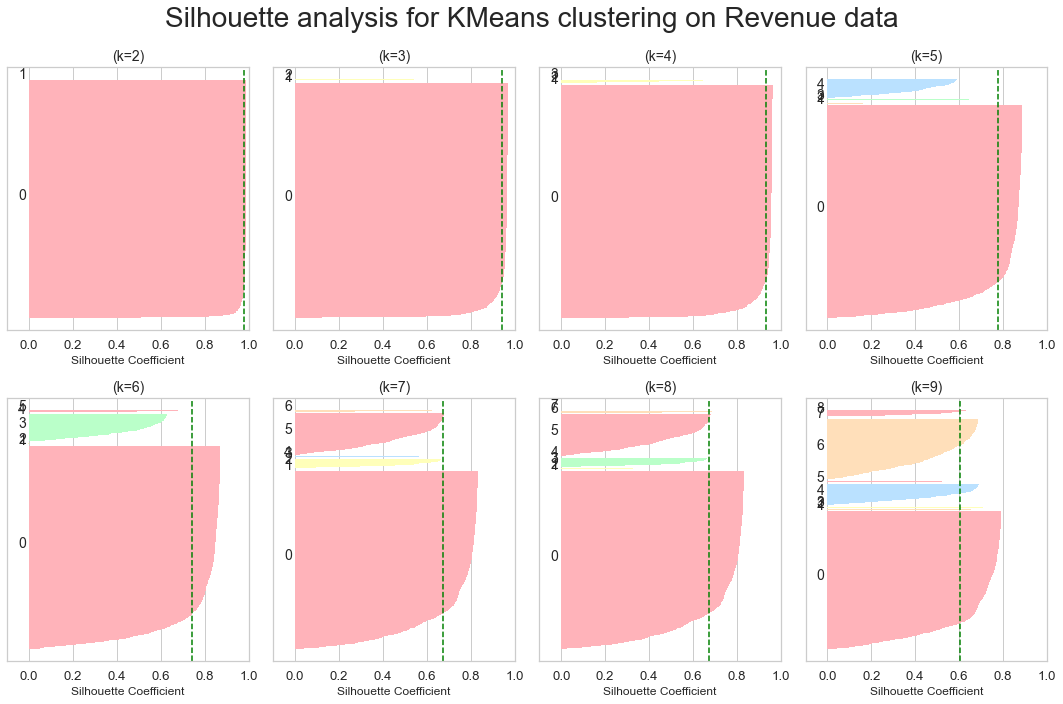

In [69]:
# Import necessary modules
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Define a list of custom colors
custom_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#ffb3ba', '#ffdfba', '#ffffba']

# Extract the Recency column from the df_uk_user_q2 DataFrame
df_revenue = df_uk_user_q2[['Revenue']]

range_n_clusters = range(2, 10)

# Create empty list to store silhouette scores for each k value
silhouette_scores = []

# Create a subplot for each k value
fig, ax = plt.subplots(2, 4, figsize=(15,10))

for i, n_clusters in enumerate(range_n_clusters):
    # Initialize KMeans and fit the data
    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000).fit(df_revenue)
    cluster_labels = kmeans.labels_

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(df_revenue, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_revenue, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Silhouette score for k={n_clusters}: {silhouette_avg}")  
    # Plot silhouette diagram
    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_jth_cluster = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_jth_cluster

        color = custom_colors[j % len(custom_colors)]

        ax[i//4, i%4].barh(
            range(y_lower, y_upper),
            jth_cluster_silhouette_values,
            height=1.0,
            edgecolor='none',
            color=color
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax[i//4, i%4].text(-0.05, y_lower + 0.5 * size_jth_cluster, str(j), fontsize=14)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    # Plot the mean silhouette coefficient for all clusters
    ax[i//4, i%4].axvline(x=silhouette_avg, color="green", linestyle="--")
    ax[i//4, i%4].set_yticks([])  # Clear the yaxis labels / ticks
    ax[i//4, i%4].set_xlim([-0.1, 1])
    ax[i//4, i%4].set_xlabel("Silhouette Coefficient", fontsize=12)
    ax[i//4, i%4].set_title(f"(k={n_clusters})", fontsize=14)

# Set the main title of the plot
fig.suptitle("Silhouette analysis for KMeans clustering on Revenue data", fontsize=28)

plt.tight_layout()
plt.show()


### Choose k=3 then Run Kmeans

In [70]:
#choose K = 3 for Kmeans models of Revenue

kmeans = KMeans(n_clusters= 3)
kmeans.fit(df_uk_user_q2[['Revenue']])
df_uk_user_q2['RevenueCluster'] =kmeans.predict(df_uk_user_q2[["Revenue"]])
df_uk_user_q2.head()

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



CustomerID  Frequency  Revenue  Recency  RecencyCluster  FrequencyCluster  \
0     17961.0         58   228.29        4               3                 0   
1     14867.0         16   313.40       26               2                 0   
2     16841.0         17   308.76       81               0                 0   
3     14239.0         22   297.26        8               3                 0   
4     15299.0          5  2065.99       47               1                 0   

   RevenueCluster  
0               0  
1               0  
2               0  
3               0  
4               0

### Check if we need to re-arrange clusters of Revenue

In [71]:
df_new = df_uk_user_q2.groupby('RevenueCluster')['Revenue'].mean().reset_index()
df_new

RevenueCluster       Revenue
0               0    627.019578
1               1  56005.286667
2               2  14572.770714

### Re-arrange Monetary Clusters

In [72]:
# Reorder Revenue Clusters
# Calculate the mean revenue for each revenue cluster
df_new = df_uk_user_q2.groupby('RevenueCluster')['Revenue'].mean().reset_index()

# Sort the revenue clusters by ascending order of mean revenue and reset the index
df_new = df_new.sort_values(by="Revenue", ascending=True).reset_index(drop=True)

# Assign a new index to the sorted revenue clusters
df_new['index'] = df_new.index

# Merge the new index of revenue clusters with the original dataframe on the RevenueCluster column
df_uk_user_q2 = pd.merge(df_uk_user_q2, df_new[['RevenueCluster', 'index']], on='RevenueCluster', how='left')

# Drop the original RevenueCluster column
df_uk_user_q2 = df_uk_user_q2.drop(['RevenueCluster'], axis=1)

# Rename the new index column as RevenueCluster
df_uk_user_q2 = df_uk_user_q2.rename(columns={"index": "RevenueCluster"})

In [73]:
df_uk_user_q2

CustomerID  Frequency  Revenue  Recency  RecencyCluster  \
0        17961.0         58   228.29        4               3   
1        14867.0         16   313.40       26               2   
2        16841.0         17   308.76       81               0   
3        14239.0         22   297.26        8               3   
4        15299.0          5  2065.99       47               1   
...          ...        ...      ...      ...             ...   
1834     17084.0        162  2949.75       50               1   
1835     14354.0          3    75.84       49               1   
1836     13596.0         18   285.44       49               1   
1837     13153.0         15   486.22       49               1   
1838     15773.0         10   635.68       49               1   

      FrequencyCluster  RevenueCluster  
0                    0               0  
1                    0               0  
2                    0               0  
3                    0               0  
4                    0               0  
...                ...             ...  
1834                 1               0  
1835                 0               0  
1836                 0               0  
1837                 0               0  
1838                 0               0  

[1839 rows x 7 columns]

In [74]:
df_uk_user_q2.groupby('RevenueCluster')['Revenue'].describe()

count          mean           std       min         25%  \
RevenueCluster                                                             
0               1822.0    627.019578    787.731824  -1462.50    194.8900   
1                 14.0  14572.770714   6388.441740   8104.95  10146.2725   
2                  3.0  56005.286667  19515.069962  42746.80  44800.8400   

                      50%       75%       max  
RevenueCluster                                 
0                 373.045    732.17   7598.72  
1               12062.640  17220.91  30862.43  
2               46854.880  62634.53  78414.18

### Kmeans Scatter Plot

C:\Users\Darius\AppData\Local\Temp\ipykernel_14036\3599039652.py:11: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



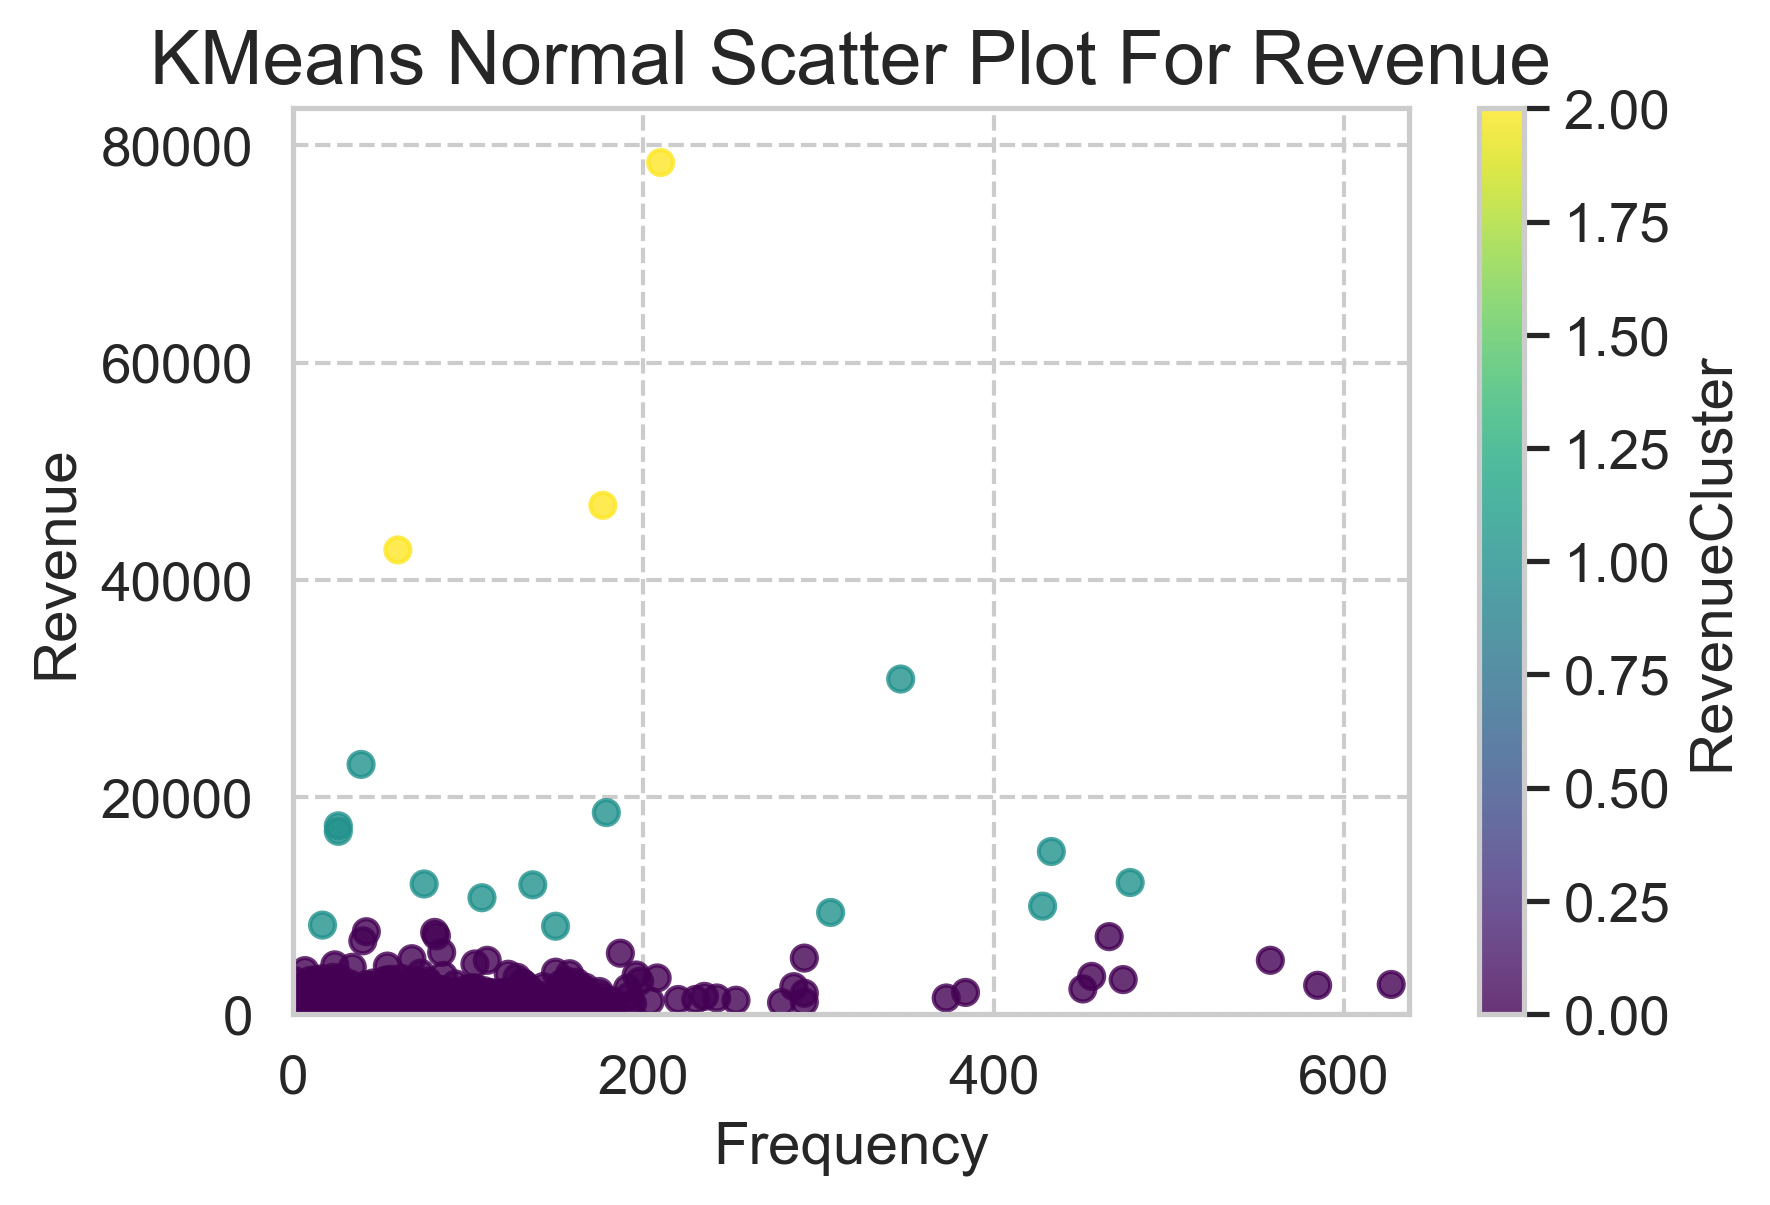

In [75]:
# Import necessary modules
import matplotlib.pyplot as plt

# Set the figure size and dpi
fig = plt.figure(figsize=(6, 4), dpi=300)

# Scatter plot of Revenue vs Frequency colored by RevenueCluster
scatter = plt.scatter(df_uk_user_q2['Frequency'], df_uk_user_q2['Revenue'], c=df_uk_user_q2['RevenueCluster'], cmap='viridis', marker='o', alpha=0.8)

# Add a color bar for the RevenueCluster
cbar = plt.colorbar(scatter)
cbar.set_label('RevenueCluster', fontsize=14)

# Set the x-axis and y-axis labels and title
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('KMeans Normal Scatter Plot For Revenue', fontsize=18)

# Set the x-axis and y-axis limits
plt.xlim(0, max(df_uk_user_q2['Frequency'])+10)
plt.ylim(0, max(df_uk_user_q2['Revenue'])+5000)

# Add grid lines
plt.grid(True, linestyle='--')

# Show the plot
plt.show()


## OVERALL SEGMENTATION

In [76]:
# OVERALL SEGMENTATION = Recency Cluster + Frequency Cluster + Revenue Cluster
df_uk_user_q2['OverallScore'] = df_uk_user_q2['RecencyCluster'] + df_uk_user_q2['FrequencyCluster']+ df_uk_user_q2['RevenueCluster']
df_uk_user_q2

CustomerID  Frequency  Revenue  Recency  RecencyCluster  \
0        17961.0         58   228.29        4               3   
1        14867.0         16   313.40       26               2   
2        16841.0         17   308.76       81               0   
3        14239.0         22   297.26        8               3   
4        15299.0          5  2065.99       47               1   
...          ...        ...      ...      ...             ...   
1834     17084.0        162  2949.75       50               1   
1835     14354.0          3    75.84       49               1   
1836     13596.0         18   285.44       49               1   
1837     13153.0         15   486.22       49               1   
1838     15773.0         10   635.68       49               1   

      FrequencyCluster  RevenueCluster  OverallScore  
0                    0               0             3  
1                    0               0             2  
2                    0               0             0  
3                    0               0             3  
4                    0               0             1  
...                ...             ...           ...  
1834                 1               0             2  
1835                 0               0             1  
1836                 0               0             1  
1837                 0               0             1  
1838                 0               0             1  

[1839 rows x 8 columns]

In [77]:
# Check the mean of features with each OverallScore
df_uk_user_q2.groupby('OverallScore')['Recency','Frequency', 'Revenue'].mean()

C:\Users\Darius\AppData\Local\Temp\ipykernel_14036\1887243525.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Recency   Frequency       Revenue
OverallScore                                     
0             76.663818   19.985755    346.837664
1             51.247826   24.278261    368.917522
2             29.430108   36.037634    584.307180
3             10.350598   34.529880    751.304562
4              7.732824  116.038168   2216.224580
5              6.823529  336.117647   8858.357059
6             10.333333  324.500000  31264.598333

### SETTING CLASSES

In [78]:
# Segmentation Customer by value of OverallScore
df_uk_user_q2['Segment'] = 'Low-Value'
df_uk_user_q2.loc[df_uk_user_q2['OverallScore'] > 2, 'Segment'] = 'Mid-Value'
df_uk_user_q2.loc[df_uk_user_q2['OverallScore'] > 4, 'Segment'] = 'High-Value'

In [79]:
df_uk_user_q2

CustomerID  Frequency  Revenue  Recency  RecencyCluster  \
0        17961.0         58   228.29        4               3   
1        14867.0         16   313.40       26               2   
2        16841.0         17   308.76       81               0   
3        14239.0         22   297.26        8               3   
4        15299.0          5  2065.99       47               1   
...          ...        ...      ...      ...             ...   
1834     17084.0        162  2949.75       50               1   
1835     14354.0          3    75.84       49               1   
1836     13596.0         18   285.44       49               1   
1837     13153.0         15   486.22       49               1   
1838     15773.0         10   635.68       49               1   

      FrequencyCluster  RevenueCluster  OverallScore    Segment  
0                    0               0             3  Mid-Value  
1                    0               0             2  Low-Value  
2                    0               0             0  Low-Value  
3                    0               0             3  Mid-Value  
4                    0               0             1  Low-Value  
...                ...             ...           ...        ...  
1834                 1               0             2  Low-Value  
1835                 0               0             1  Low-Value  
1836                 0               0             1  Low-Value  
1837                 0               0             1  Low-Value  
1838                 0               0             1  Low-Value  

[1839 rows x 9 columns]

### Calculate Distribution of group with Overall Score 

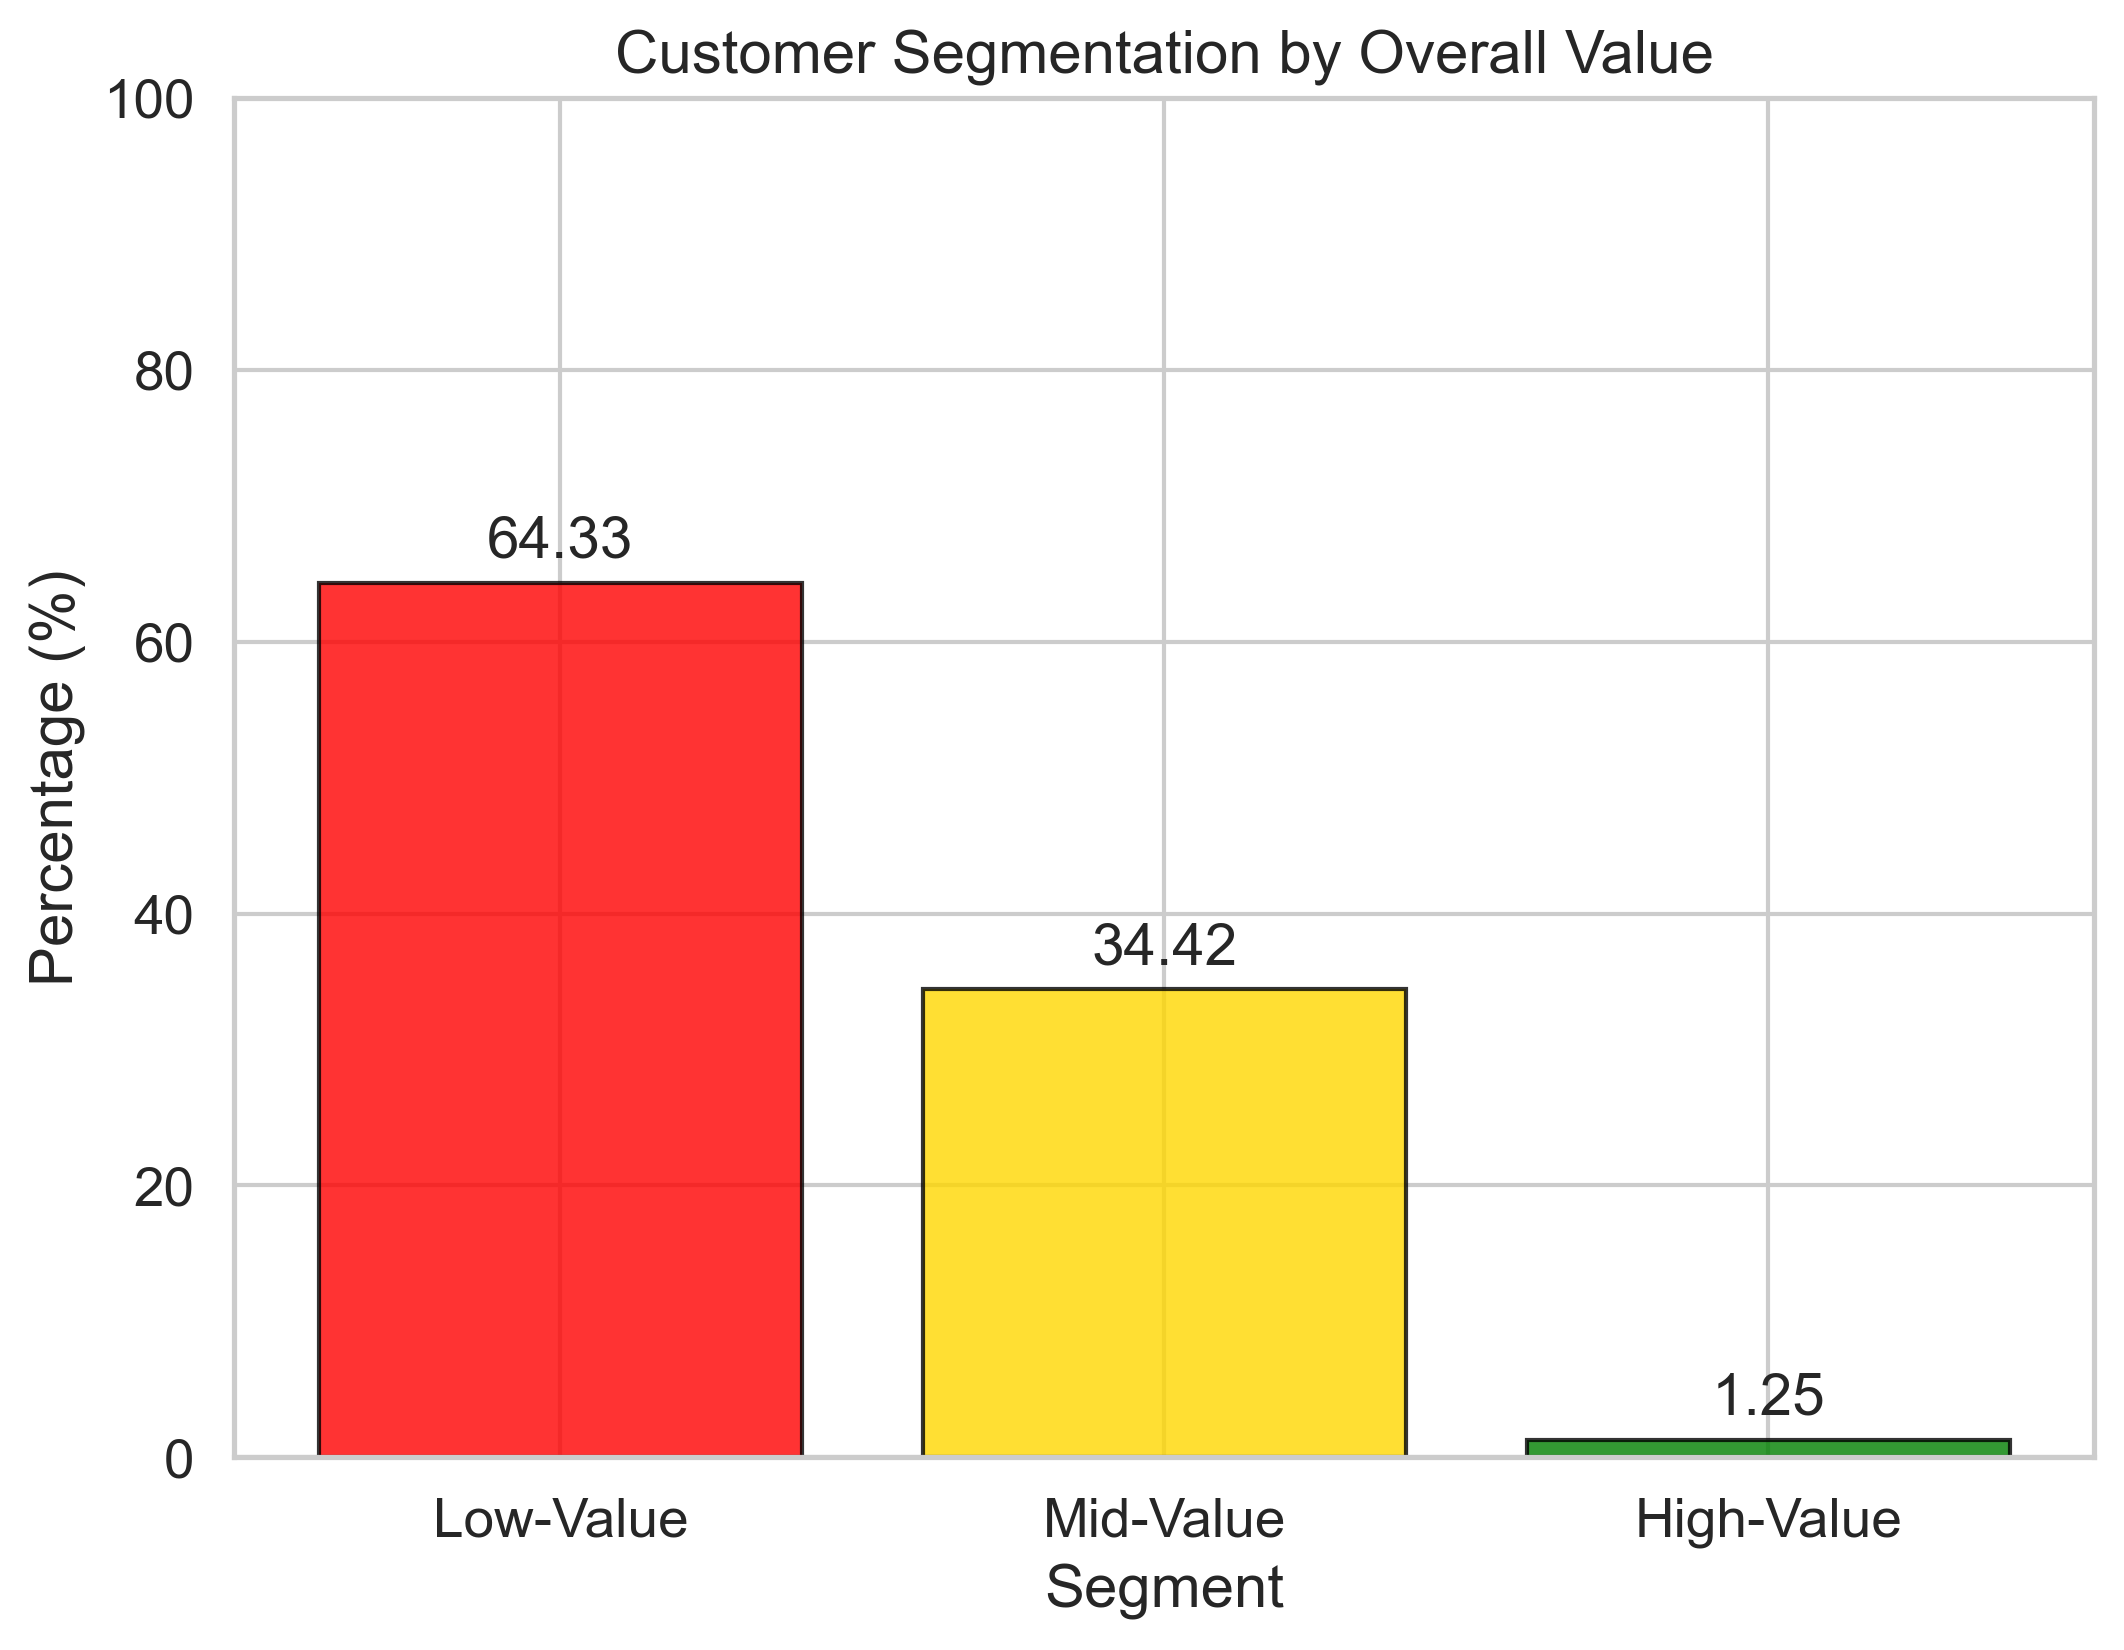

In [80]:
import matplotlib.pyplot as plt

# Calculate percentage of each segment
segment_counts = df_uk_user_q2['Segment'].value_counts(normalize=True)
low_value = round(segment_counts['Low-Value']*100, 2)
mid_value = round(segment_counts['Mid-Value']*100, 2)
high_value = round(segment_counts['High-Value']*100, 2)

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
ax.bar(x=['Low-Value', 'Mid-Value', 'High-Value'], height=[low_value, mid_value, high_value], color=['red', 'gold', 'green'], alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Customer Segmentation by Overall Value')
ax.set_xlabel('Segment')
ax.set_ylabel('Percentage (%)')
ax.set_ylim([0, 100])

# Add markers
for i, v in enumerate([low_value, mid_value, high_value]):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=14)

plt.show()


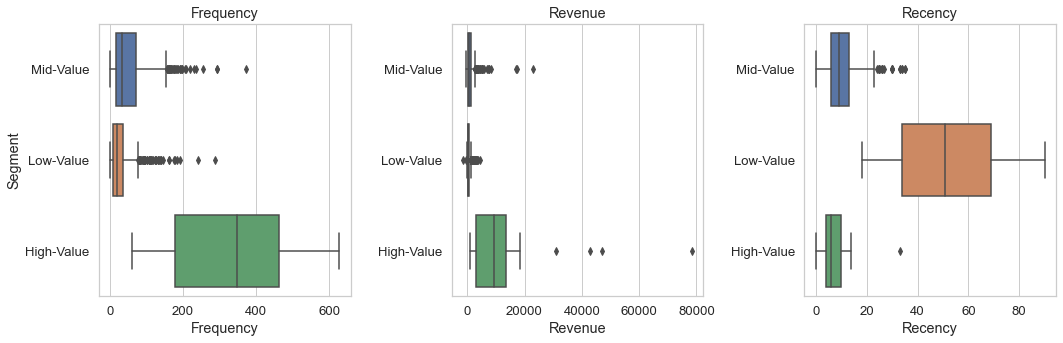

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of variables and the list of segments to plot
variables = ['Frequency', 'Revenue', 'Recency']
segments = df_uk_user_q2['Segment'].unique()

# Set up the figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop over the variables and the segments to create the boxplots
for i, variable in enumerate(variables):
    for j, segment in enumerate(segments):
        # Filter the dataframe to include only the current segment
        df_segment = df_uk_user_q2[df_uk_user_q2['Segment'] == segment]
        
        # Create a boxplot for the current variable and segment
        sns.boxplot(x=variable, y='Segment', data=df_segment, ax=axs[i], order=segments)
        
        # Set the title for the current subplot
        if j == 0:
            axs[i].set_title(variable)
        
        # Remove the y-axis label for all but the first subplot
        if i != 0:
            axs[i].set_ylabel('')
        
        # Set the x-axis label for the first subplot only
        if i == 0:
            axs[i].set_xlabel(variable)

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()


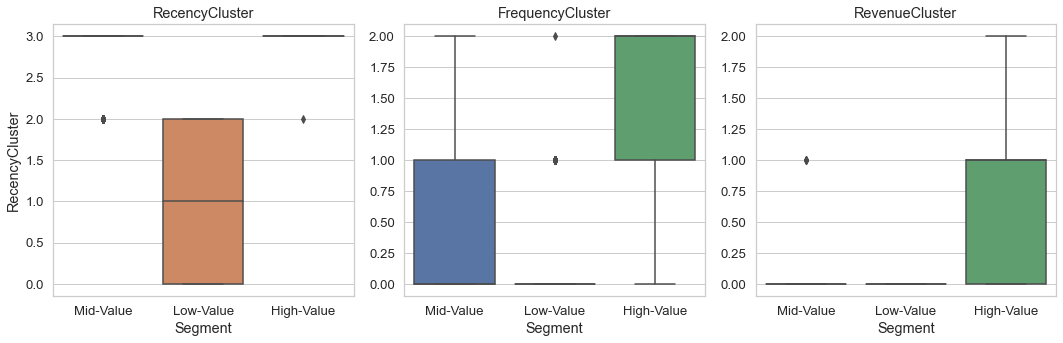

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of variables and the list of segments to plot
variables = ['RecencyCluster', 'FrequencyCluster', 'RevenueCluster']
segments = df_uk_user_q2['Segment'].unique()

# Set up the figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop over the variables and the segments to create the boxplots
for i, variable in enumerate(variables):
    for j, segment in enumerate(segments):
        # Filter the dataframe to include only the current segment
        df_segment = df_uk_user_q2[df_uk_user_q2['Segment'] == segment]
        
        # Create a boxplot for the current variable and segment
        sns.boxplot(x='Segment', y=variable, data=df_segment, ax=axs[i], order=segments)
        
        # Set the title for the current subplot
        if j == 0:
            axs[i].set_title(variable)
        
        # Remove the y-axis label for all but the first subplot
        if i != 0:
            axs[i].set_ylabel('')
        
        # Set the x-axis label for the first subplot only
        if i == 0:
            axs[i].set_xlabel('Segment')

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
plt.show()


### Visualization correlation between features

#### Frequency vs Revenue(Monetary)


In [83]:
# Visualization 

# Frequency vs Revenue(Monetary)

df_graph = df_uk_user_q2.query("Revenue < 50000 and Frequency < 2000")

plot_data = [    go.Scatter(        x = df_graph.query("Segment == 'Low-Value'")['Frequency'],
        y = df_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode = 'markers',
        name = "Low",
        marker =dict(size= 11,
                    line = dict(width = 1),
                    color = 'red',
                    opacity = 0.7)),
    go.Scatter(
        x = df_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y = df_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode = 'markers',
        name = "Mid",
        marker =dict(size= 13,
                    line = dict(width = 1),
                    color = 'yellow',
                    opacity = 0.4)),
    go.Scatter(
        x = df_graph.query("Segment == 'High-Value'")['Frequency'],
        y = df_graph.query("Segment == 'High-Value'")['Revenue'],
        mode = 'markers',
        name = "High",
        marker =dict(size= 15,
                    line = dict(width = 1),
                    color = 'green',
                    opacity = 0.9))
    
]
# Set the plot layout
plot_layout = go.Layout(
    title = {
        'text': 'Customer Segmentation Frequency - Revenue in q2',
        'font': {'size': 38}
    },
    xaxis = {
        'title': {
            'text': 'Revenue',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    },
    yaxis = {
        'title': {
            'text': 'Frequency',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    }
)
fig = go.Figure(data = plot_data, layout=plot_layout)
pyoff.plot(fig)


'temp-plot.html'

#### Recency - Revenue


In [84]:
# Recency - Revenue
df_graph = df_uk_user_q2.query("Revenue < 50000 and Frequency < 2000")

plot_data = [    
    go.Scatter(
        x = df_graph.query("Segment == 'Low-Value'")['Recency'],
        y = df_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode = 'markers',
        name = "Low",
        marker =dict(size= 11,
                    line = dict(width = 1),
                    color = 'red',
                    opacity = 0.9)),
    go.Scatter(
        x = df_graph.query("Segment == 'Mid-Value'")['Recency'],
        y = df_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode = 'markers',
        name = "Mid",
        marker =dict(size= 13,
                    line = dict(width = 1),
                    color = 'yellow',
                    opacity = 0.8)),
    go.Scatter(
        x = df_graph.query("Segment == 'High-Value'")['Recency'],
        y = df_graph.query("Segment == 'High-Value'")['Revenue'],
        mode = 'markers',
        name = "High",
        marker =dict(size= 15,
                    line = dict(width = 1),
                    color = 'green',
                    opacity = 0.8))
    
]
# Set the plot layout
plot_layout = go.Layout(
    title = {
        'text': 'Customer Segmentation Recency - Revenue in q2',
        'font': {'size': 38}
    },
    xaxis = {
        'title': {
            'text': 'Revenue',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    },
    yaxis = {
        'title': {
            'text': 'Recency',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    }
)

fig = go.Figure(data = plot_data, layout=plot_layout)
pyoff.plot(fig)



'temp-plot.html'

#### Recency - Frequency


In [85]:
# Recency - Frequency
df_graph = df_uk_user_q2.query("Revenue < 50000 and Frequency < 1000")

plot_data = [    
    go.Scatter(
        x = df_graph.query("Segment == 'Low-Value'")['Recency'],
        y = df_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode = 'markers',
        name = "Low",
        marker =dict(size= 11,
                    line = dict(width = 1),
                    color = 'red',
                    opacity = 0.9)),
    go.Scatter(
        x = df_graph.query("Segment == 'Mid-Value'")['Recency'],
        y = df_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode = 'markers',
        name = "Mid",
        marker =dict(size= 13,
                    line = dict(width = 1),
                    color = 'yellow',
                    opacity = 0.8)),
    go.Scatter(
        x = df_graph.query("Segment == 'High-Value'")['Recency'],
        y = df_graph.query("Segment == 'High-Value'")['Frequency'],
        mode = 'markers',
        name = "High",
        marker =dict(size= 15,
                    line = dict(width = 1),
                    color = 'green',
                    opacity = 0.8))
    
]
# Set the plot layout
plot_layout = go.Layout(
    title = {
        'text': 'Customer Segmentation Recency - Frequency in q2',
        'font': {'size': 38}
    },
    xaxis = {
        'title': {
            'text': 'Frequency',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    },
    yaxis = {
        'title': {
            'text': 'Recency',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    }
)
fig = go.Figure(data = plot_data, layout=plot_layout)
pyoff.plot(fig)



'temp-plot.html'

# CUSTOMER LIFETIME VALUE PREDICTION
1. Select a time window. It can be 3, 6, 12, 24 months
2. Lifetime Value: Total Gross Revenue - Total Cost
3. Build a machine learning model the predicts our LTV (With Random Forest, SVM and XGBoost models)

Based on 3 months of data (quarter  2 of 2011), calculate RFM, use it for prediction next 6 months(quarter 3 & 4 )

In [86]:
# Import Libraries
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV
df_uk

Invoice StockCode                         Description  Quantity  \
0       494163     22358             KINGS CHOICE TEA CADDY         24   
1       494163     22357            KINGS CHOICE BISCUIT TIN         8   
2       494164    84899E  YELLOW + BROWN BEAR FELT PURSE KIT         2   
3       494164     21335                        LIBRARY LAMP         1   
4       494230     48138                 DOOR MAT UNION FLAG         1   
...        ...       ...                                 ...       ...   
338224  580490     21912            VINTAGE SNAKES & LADDERS       144   
338225  580490     21166          COOK WITH WINE METAL SIGN         12   
338226  580490     21175       GIN AND TONIC DIET METAL SIGN        12   
338227  580490     21169     YOU'RE CONFUSING ME METAL SIGN         12   
338228  580490    16169E                WRAP 50'S  CHRISTMAS        25   

       InvoiceDate  Price  CustomerID         Country  InvoiceYearMonth  \
0       2010-12-01   2.55     13433.0  United Kingdom            201012   
1       2010-12-01   4.25     13433.0  United Kingdom            201012   
2       2010-12-01   1.25     17961.0  United Kingdom            201012   
3       2010-12-01  21.95     17961.0  United Kingdom            201012   
4       2010-12-01   6.75     17961.0  United Kingdom            201012   
...            ...    ...         ...             ...               ...   
338224  2011-04-12   3.39     15773.0  United Kingdom            201104   
338225  2011-04-12   2.08     15773.0  United Kingdom            201104   
338226  2011-04-12   2.55     15773.0  United Kingdom            201104   
338227  2011-04-12   1.69     15773.0  United Kingdom            201104   
338228  2011-04-12   0.42     15773.0  United Kingdom            201104   

        Revenue     MinPurchaseDate  MinPurchaseYearMonth UserType  
0         61.20 2010-12-01 08:59:00                201012      New  
1         34.00 2010-12-01 08:59:00                201012      New  
2          2.50 2010-12-01 09:24:00                201012      New  
3         21.95 2010-12-01 09:24:00                201012      New  
4          6.75 2010-12-01 09:24:00                201012      New  
...         ...                 ...                   ...      ...  
338224   488.16 2011-04-12 12:48:00                201104      New  
338225    24.96 2011-04-12 12:48:00                201104      New  
338226    30.60 2011-04-12 12:48:00                201104      New  
338227    20.28 2011-04-12 12:48:00                201104      New  
338228    10.50 2011-04-12 12:48:00                201104      New  

[338229 rows x 13 columns]

In [87]:
from datetime import datetime, timedelta, date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import seaborn as sns
import plotly.offline as pyoff
import plotly.graph_objs as go

### CHOOSING PERIOD FOR THE DATASET



In [88]:
# Based on 3 months of data (quarter 2 of 2011), calculate RFM, use it for prediction next 6 months
# Calculate revenue and create a new dataframe for it

df_q34 = df_uk[(df_uk.InvoiceDate >= date(2011,6,1)) & (df_uk.InvoiceDate <= date(2011,12,1))]
df_q34['Revenue'] = df_q34['Price'] * df_q34['Quantity']

df_user_q34 = df_q34.groupby('CustomerID')['Revenue'].sum().reset_index()
df_user_q34.columns = ['CustomerID', 'q34_Revenue']

C:\Users\Darius\AppData\Local\Temp\ipykernel_14036\4068082205.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
df_q34.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201400 entries, 73 to 338055
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Invoice               201400 non-null  object        
 1   StockCode             201400 non-null  object        
 2   Description           201400 non-null  object        
 3   Quantity              201400 non-null  int64         
 4   InvoiceDate           201400 non-null  object        
 5   Price                 201400 non-null  float64       
 6   CustomerID            201400 non-null  float64       
 7   Country               201400 non-null  object        
 8   InvoiceYearMonth      201400 non-null  int64         
 9   Revenue               201400 non-null  float64       
 10  MinPurchaseDate       201400 non-null  datetime64[ns]
 11  MinPurchaseYearMonth  201400 non-null  int64         
 12  UserType              201400 non-null  object        
dty

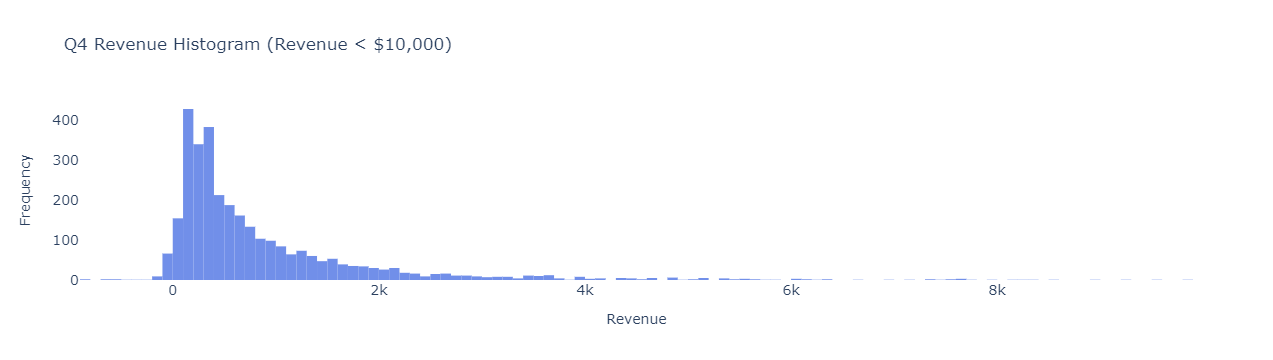

In [90]:
# Import necessary libraries
import plotly.graph_objs as go
import plotly.offline as pyoff

# Filter data and create histogram
plot_data = [
    go.Histogram(
        x=df_user_q34.query('-1000<q34_Revenue < 10000')['q34_Revenue'],
        marker=dict(
            color='royalblue'
        ),
        opacity=0.75
    )
]

# Define plot layout
plot_layout = go.Layout(
    title='Q4 Revenue Histogram (Revenue < $10,000)',
    xaxis=dict(
        title='Revenue',
        tickfont=dict(
            size=14
        ),
        showgrid=False
    ),
    yaxis=dict(
        title='Frequency',
        tickfont=dict(
            size=14
        ),
        showgrid=False
    ),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Create plot figure and display
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


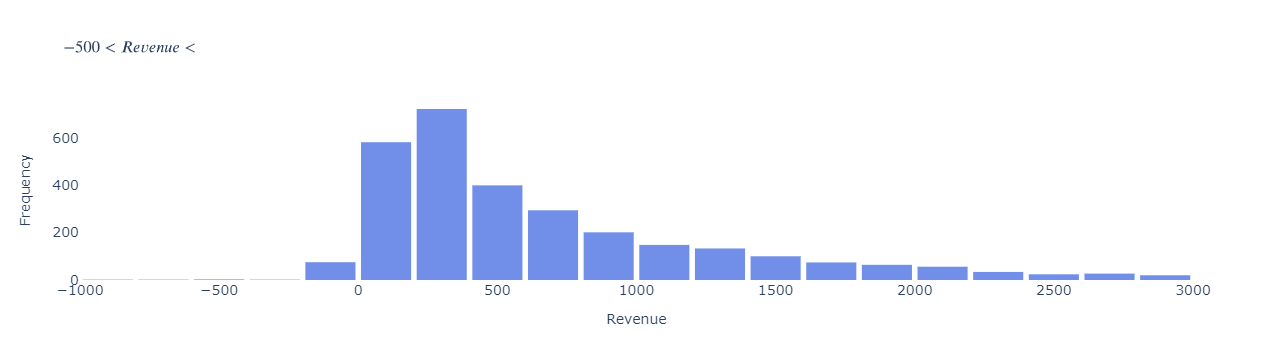

In [91]:
# Import necessary libraries
import plotly.graph_objs as go
import plotly.offline as pyoff

# Filter data and create histogram
plot_data = [
    go.Histogram(
        x=df_user_q34.query('-1000<q34_Revenue < 3000')['q34_Revenue'],
        marker=dict(
            color='royalblue'
        ),
        opacity=0.75,
        xbins=dict(
            start=-1000,
            end=3000,
            size=200
        ),
        autobinx=False
    )
]

# Define plot layout
plot_layout = go.Layout(
    title='Q4 Revenue Histogram ($-500< Revenue < $10000)',
    xaxis=dict(
        title='Revenue',
        tickfont=dict(
            size=14
        ),
        showgrid=False
    ),
    yaxis=dict(
        title='Frequency',
        tickfont=dict(
            size=14
        ),
        showgrid=False
    ),
    bargap=0.1,  # Add gaps between bins
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Create plot figure and display
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


### Merge our 3 months and 6 months dataframes to see correlations between LTV and features


In [92]:
# Merge 3 months and 6 months dataframes to see correlations between LTV and features
df_merge = pd.merge(df_uk_user_q2, df_user_q34, on = 'CustomerID', how = 'left')
df_merge = df_merge.fillna(0)
df_merge

CustomerID  Frequency  Revenue  Recency  RecencyCluster  \
0        17961.0         58   228.29        4               3   
1        14867.0         16   313.40       26               2   
2        16841.0         17   308.76       81               0   
3        14239.0         22   297.26        8               3   
4        15299.0          5  2065.99       47               1   
...          ...        ...      ...      ...             ...   
1834     17084.0        162  2949.75       50               1   
1835     14354.0          3    75.84       49               1   
1836     13596.0         18   285.44       49               1   
1837     13153.0         15   486.22       49               1   
1838     15773.0         10   635.68       49               1   

      FrequencyCluster  RevenueCluster  OverallScore    Segment  q34_Revenue  
0                    0               0             3  Mid-Value       413.42  
1                    0               0             2  Low-Value       396.88  
2                    0               0             0  Low-Value      1148.48  
3                    0               0             3  Mid-Value       960.56  
4                    0               0             1  Low-Value      -113.91  
...                ...             ...           ...        ...          ...  
1834                 1               0             2  Low-Value         0.00  
1835                 0               0             1  Low-Value        87.78  
1836                 0               0             1  Low-Value       411.60  
1837                 0               0             1  Low-Value         0.00  
1838                 0               0             1  Low-Value         0.00  

[1839 rows x 10 columns]

In [93]:
# plot Scater of 3 Customer Segmentation

# Recency - Revenue
df_graph = df_merge.query("q34_Revenue < 30000")

plot_data = [    
    go.Scatter(
        x = df_graph.query("Segment == 'Low-Value'")['OverallScore'],
        y = df_graph.query("Segment == 'Low-Value'")['q34_Revenue'],
        mode = 'markers',
        name = "Low",
        marker =dict(size= 11,
                    line = dict(width = 1),
                    color = 'red',
                    opacity = 0.9)),
    go.Scatter(
        x = df_graph.query("Segment == 'Mid-Value'")['OverallScore'],
        y = df_graph.query("Segment == 'Mid-Value'")['q34_Revenue'],
        mode = 'markers',
        name = "Mid",
        marker =dict(size= 13,
                    line = dict(width = 1),
                    color = 'yellow',
                    opacity = 0.8)),
    go.Scatter(
        x = df_graph.query("Segment == 'High-Value'")['OverallScore'],
        y = df_graph.query("Segment == 'High-Value'")['q34_Revenue'],
        mode = 'markers',
        name = "High",
        marker =dict(size= 15,
                    line = dict(width = 1),
                    color = 'green',
                    opacity = 0.8))
    
]
# Set the plot layout
plot_layout = go.Layout(
    title = {
        'text': 'Relationship between LTV and RFM',
        'font': {'size': 38}
    },
    xaxis = {
        'title': {
            'text': 'RFM score',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    },
    yaxis = {
        'title': {
            'text': '3 month LTV (q34)',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    }
)
fig = go.Figure(data = plot_data, layout=plot_layout)
pyoff.plot(fig)

'temp-plot.html'

In [94]:
# Remove Outliers 
df_merge = df_merge[df_merge['q34_Revenue'] < df_merge['q34_Revenue'].quantile(0.99)]

### Using Kmeans to cluster data to segments


In [95]:
# Clustering for Frequency
import plotly.graph_objs as go
import plotly.offline as pyoff
from sklearn.cluster import KMeans


# Initialize an empty list of SSE values

sse = [0] * 10
df_segment = df_merge[['q34_Revenue']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_segment)
    df_segment["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

# Create a scatter plot of SSE values for each k
plot_data = [ 
    go.Scatter(
        x = list(range(2, 10)),
        y = sse[1:10],
        line=dict(width=3.6) # set line width to 3.6
    )
]

# Set the plot layout
plot_layout = go.Layout(
    title = {
        'text': 'Number of Clusters of LTV in q34',
        'font': {'size': 38}
    },
    xaxis = {
        'title': {
            'text': 'Number of clusters',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    },
    yaxis = {
        'title': {
            'text': 'SSE',
            'font': {'size': 30}
        },
        'tickfont': {'size': 24}
    }
)


# Create the plot figure
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.plot(fig)


C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\Darius\AppData\Local\Temp\ipykernel_14036\2321904966.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 

'temp-plot.html'

### Silhouette For CLV

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users

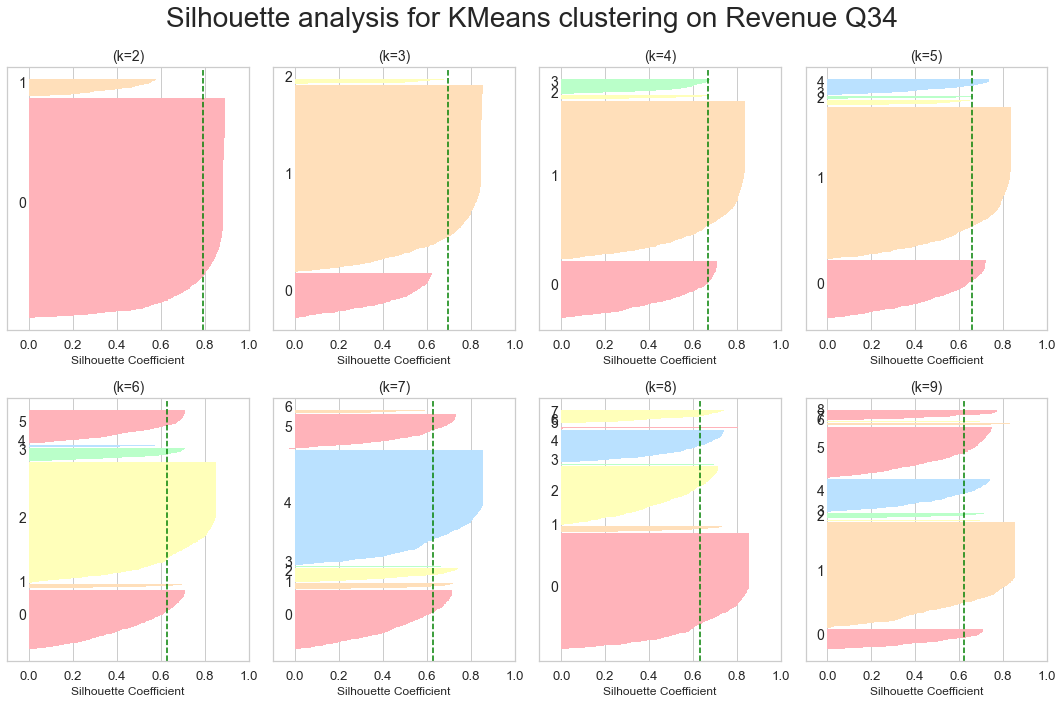

In [96]:
# Import necessary modules
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Define a list of custom colors
custom_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#ffb3ba', '#ffdfba', '#ffffba']

# Extract the LTV column from the df_merge DataFrame
df_segment = df_merge[['q34_Revenue']]

range_n_clusters = range(2, 10)

# Create a subplot for each k value
fig, ax = plt.subplots(2, 4, figsize=(15,10))

for i, n_clusters in enumerate(range_n_clusters):
    # Initialize KMeans and fit the data
    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000).fit(df_segment)
    cluster_labels = kmeans.labels_

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(df_segment, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_segment, cluster_labels)

    # Plot silhouette diagram
    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_jth_cluster = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_jth_cluster

        color = custom_colors[j % len(custom_colors)]

        ax[i//4, i%4].barh(
            range(y_lower, y_upper),
            jth_cluster_silhouette_values,
            height=1.0,
            edgecolor='none',
            color=color
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax[i//4, i%4].text(-0.05, y_lower + 0.5 * size_jth_cluster, str(j), fontsize=14)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    # Plot the mean silhouette coefficient for all clusters
    ax[i//4, i%4].axvline(x=silhouette_avg, color="green", linestyle="--")
    ax[i//4, i%4].set_yticks([])  # Clear the yaxis labels / ticks
    ax[i//4, i%4].set_xlim([-0.1, 1])
    ax[i//4, i%4].set_xlabel("Silhouette Coefficient", fontsize=12)
    ax[i//4, i%4].set_title(f"(k={n_clusters})", fontsize=14)

# Set the main title of the plot
fig.suptitle("Silhouette analysis for KMeans clustering on Revenue Q34", fontsize=28)

plt.tight_layout()
plt.show()

In [97]:
# Creatings 3 clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_merge[['q34_Revenue']])
df_merge['LTVCluster'] = kmeans.predict(df_merge[['q34_Revenue']])

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\Darius\AppData\Local\Temp\ipykernel_14036\1428340418.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Re-Order cluster number based on LTV


In [98]:
# Re-Order cluster number based on Life Time Value

df_new = df_merge.groupby('LTVCluster')['q34_Revenue'].mean().reset_index()
df_new = df_new.sort_values( by = "q34_Revenue", ascending = True).reset_index(drop = True)
df_new['index'] = df_new.index

df_merge = pd.merge(df_merge, df_new[['LTVCluster', 'index']], on='LTVCluster', how='left')
df_merge.head()
df_merge = df_merge.drop(['LTVCluster'], axis = 1)
df_merge = df_merge.rename(columns = {"index" : "LTVCluster"})

df_merge.groupby('LTVCluster')['q34_Revenue'].describe()

count         mean          std      min        25%      50%  \
LTVCluster                                                                  
0           1435.0   400.180600   437.832247  -823.50     0.0000   282.15   
1            345.0  2655.595275  1067.083669  1530.16  1838.6700  2232.23   
2             40.0  9153.583750  2567.435747  6007.49  7375.0125  8356.97   

                   75%       max  
LTVCluster                        
0             682.9700   1524.74  
1            3373.5500   5837.93  
2           10365.7275  15327.77

In [99]:
# Create a new cluster dataframe
df_cluster = df_merge.copy()
df_cluster.head()

CustomerID  Frequency  Revenue  Recency  RecencyCluster  FrequencyCluster  \
0     17961.0         58   228.29        4               3                 0   
1     14867.0         16   313.40       26               2                 0   
2     16841.0         17   308.76       81               0                 0   
3     14239.0         22   297.26        8               3                 0   
4     15299.0          5  2065.99       47               1                 0   

   RevenueCluster  OverallScore    Segment  q34_Revenue  LTVCluster  
0               0             3  Mid-Value       413.42           0  
1               0             2  Low-Value       396.88           0  
2               0             0  Low-Value      1148.48           0  
3               0             3  Mid-Value       960.56           0  
4               0             1  Low-Value      -113.91           0

In [100]:
# see details of the clusters
df_cluster.groupby('LTVCluster')['q34_Revenue'].describe()

count         mean          std      min        25%      50%  \
LTVCluster                                                                  
0           1435.0   400.180600   437.832247  -823.50     0.0000   282.15   
1            345.0  2655.595275  1067.083669  1530.16  1838.6700  2232.23   
2             40.0  9153.583750  2567.435747  6007.49  7375.0125  8356.97   

                   75%       max  
LTVCluster                        
0             682.9700   1524.74  
1            3373.5500   5837.93  
2           10365.7275  15327.77

### USING GET DUMMIES TO NUMERICAL FEATURES

In [101]:
# MACHINE LEARING

# convert categorical columns to numerical
df_class = pd.get_dummies(df_cluster)
df_class.head()

CustomerID  Frequency  Revenue  Recency  RecencyCluster  FrequencyCluster  \
0     17961.0         58   228.29        4               3                 0   
1     14867.0         16   313.40       26               2                 0   
2     16841.0         17   308.76       81               0                 0   
3     14239.0         22   297.26        8               3                 0   
4     15299.0          5  2065.99       47               1                 0   

   RevenueCluster  OverallScore  q34_Revenue  LTVCluster  Segment_High-Value  \
0               0             3       413.42           0                   0   
1               0             2       396.88           0                   0   
2               0             0      1148.48           0                   0   
3               0             3       960.56           0                   0   
4               0             1      -113.91           0                   0   

   Segment_Low-Value  Segment_Mid-Value  
0                  0                  1  
1                  1                  0  
2                  1                  0  
3                  0                  1  
4                  1                  0

## CORRELATION BETWEEN FEATURES

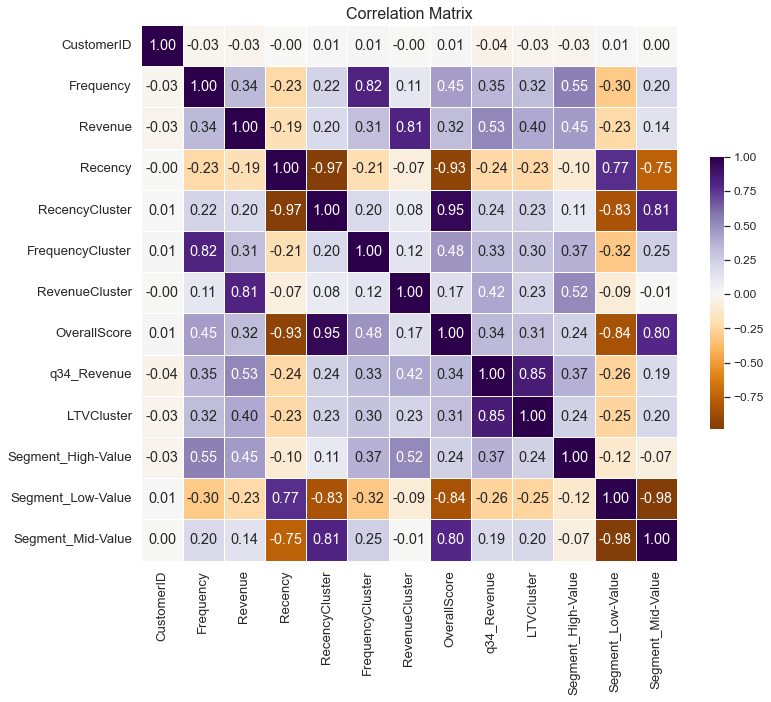

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the correlation matrix
corr_matrix = df_class.corr()

# Set up the matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, cmap='PuOr', annot=True, fmt='.2f', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Set the title and adjust the position of the colorbar
ax.set_title('Correlation Matrix', fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# Save the figure as a PNG file with DPI 300
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [103]:
#sort descending
corr_matrix['LTVCluster'].sort_values(ascending = False)

LTVCluster            1.000000
q34_Revenue           0.849229
Revenue               0.404218
Frequency             0.321529
OverallScore          0.311443
FrequencyCluster      0.303131
Segment_High-Value    0.238082
RecencyCluster        0.233605
RevenueCluster        0.225009
Segment_Mid-Value     0.202882
CustomerID           -0.033785
Recency              -0.232212
Segment_Low-Value    -0.246829
Name: LTVCluster, dtype: float64

In [104]:
df_class

CustomerID  Frequency  Revenue  Recency  RecencyCluster  \
0        17961.0         58   228.29        4               3   
1        14867.0         16   313.40       26               2   
2        16841.0         17   308.76       81               0   
3        14239.0         22   297.26        8               3   
4        15299.0          5  2065.99       47               1   
...          ...        ...      ...      ...             ...   
1815     17084.0        162  2949.75       50               1   
1816     14354.0          3    75.84       49               1   
1817     13596.0         18   285.44       49               1   
1818     13153.0         15   486.22       49               1   
1819     15773.0         10   635.68       49               1   

      FrequencyCluster  RevenueCluster  OverallScore  q34_Revenue  LTVCluster  \
0                    0               0             3       413.42           0   
1                    0               0             2       396.88           0   
2                    0               0             0      1148.48           0   
3                    0               0             3       960.56           0   
4                    0               0             1      -113.91           0   
...                ...             ...           ...          ...         ...   
1815                 1               0             2         0.00           0   
1816                 0               0             1        87.78           0   
1817                 0               0             1       411.60           0   
1818                 0               0             1         0.00           0   
1819                 0               0             1         0.00           0   

      Segment_High-Value  Segment_Low-Value  Segment_Mid-Value  
0                      0                  0                  1  
1                      0                  1                  0  
2                      0                  1                  0  
3                      0                  0                  1  
4                      0                  1                  0  
...                  ...                ...                ...  
1815                   0                  1                  0  
1816                   0                  1                  0  
1817                   0                  1                  0  
1818                   0                  1                  0  
1819                   0                  1                  0  

[1820 rows x 13 columns]

In [105]:
#MODEL 1: Prediction Clusters of Customer Lifetime Value 
# import libraries for ML

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [106]:
# create X and y, X will be features set and y is the label - LTV
X = df_class.drop(['LTVCluster', 'q34_Revenue'], axis = 1)
y = df_class['LTVCluster']

## BASIC XGBOOST MODEL

### SPLIT TRAIN, VALIDATION AND TEST SETS 

In [107]:
from sklearn.model_selection import train_test_split

# Split data into 80% training, 10% validation, and 10% test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=26)

ltv_xgb_model_split = xgb.XGBClassifier(maxdepth=3, learning_rate=0.1, objective='multi:softprob', n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB Classifier on training set: {:.2f}'.format(ltv_xgb_model_split.score(X_train, y_train)))
print('Accuracy of XGB Classifier on validation set : {:.2f}'.format(ltv_xgb_model_split.score(X_val[X_train.columns], y_val)))
print('Accuracy of XGB Classifier on test set : {:.2f}'.format(ltv_xgb_model_split.score(X_test[X_train.columns], y_test)))


[09:53:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "maxdepth" } are not used.

Accuracy of XGB Classifier on training set: 0.96
Accuracy of XGB Classifier on validation set : 0.77
Accuracy of XGB Classifier on test set : 0.85


### RESULT AFTER SPLIT TRAIN, VALIDATION AND TEST SETS 

In [108]:
from sklearn.metrics import classification_report

y_pred = ltv_xgb_model_split.predict(X_test)
y_train_pred = ltv_xgb_model_split.predict(X_train)

print("Classification Report of XGBOOST model for Test Data:")
print(classification_report(y_test, y_pred))

print("Classification Report for Train Data:")
print(classification_report(y_train, y_train_pred))


Classification Report of XGBOOST model for Test Data:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       153
           1       0.44      0.27      0.33        26
           2       1.00      0.67      0.80         3

    accuracy                           0.85       182
   macro avg       0.77      0.63      0.68       182
weighted avg       0.82      0.85      0.83       182

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1126
           1       0.99      0.80      0.89       280
           2       1.00      0.96      0.98        27

    accuracy                           0.96      1433
   macro avg       0.98      0.92      0.95      1433
weighted avg       0.96      0.96      0.96      1433



### Using GridCV Search to improve the XGBoost model

In [109]:
from sklearn.model_selection import GridSearchCV

# define parameters to be tested in the grid search
params = {'max_depth': [3, 5, 7,9],
          'learning_rate': [0.1, 0.01, 0.001],
          'n_estimators': [50, 100, 200, 400],
          'objective': ['multi:softprob']}

# create an XGBClassifier object
xgb_model = xgb.XGBClassifier(n_jobs=-1)

# create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=3)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'objective': 'multi:softprob'}
Best score:  0.8052945975105917


### Fit the XGBoost Model with best parameters and show results again

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Split data into 80% training, 10% validation, and 10% test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=26)

# Fit the model with the best parameters
best_ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=50, objective='multi:softprob', n_jobs=-1).fit(X_train, y_train)

# Print the accuracies on the training, validation, and test sets
print('Accuracy of XGB Classifier on training set: {:.2f}'.format(best_ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB Classifier on validation set : {:.2f}'.format(best_ltv_xgb_model.score(X_val[X_train.columns], y_val)))
print('Accuracy of XGB Classifier on test set : {:.2f}'.format(best_ltv_xgb_model.score(X_test[X_train.columns], y_test)))


Accuracy of XGB Classifier on training set: 0.85
Accuracy of XGB Classifier on validation set : 0.77
Accuracy of XGB Classifier on test set : 0.87


### Result of XGBoost after using GridCV

In [111]:
from sklearn.metrics import classification_report

y_pred = best_ltv_xgb_model.predict(X_test)
y_train_pred = best_ltv_xgb_model.predict(X_train)

print("Classification Report of XGBOOST after tuning for Test Data:")
print(classification_report(y_test, y_pred))

print("Classification Report for Train Data:")
print(classification_report(y_train, y_train_pred))


Classification Report of XGBOOST after tuning for Test Data:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       153
           1       0.58      0.27      0.37        26
           2       1.00      0.33      0.50         3

    accuracy                           0.87       182
   macro avg       0.82      0.53      0.60       182
weighted avg       0.85      0.87      0.84       182

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1126
           1       0.68      0.43      0.53       280
           2       0.92      0.41      0.56        27

    accuracy                           0.85      1433
   macro avg       0.82      0.60      0.67      1433
weighted avg       0.83      0.85      0.83      1433



### Count percentage of clusters 

In [112]:
df_class.groupby('LTVCluster').CustomerID.count()/df_class.CustomerID.count()

LTVCluster
0    0.788462
1    0.189560
2    0.021978
Name: CustomerID, dtype: float64

### PLOT PERCENTAGE OF CLUSTERS

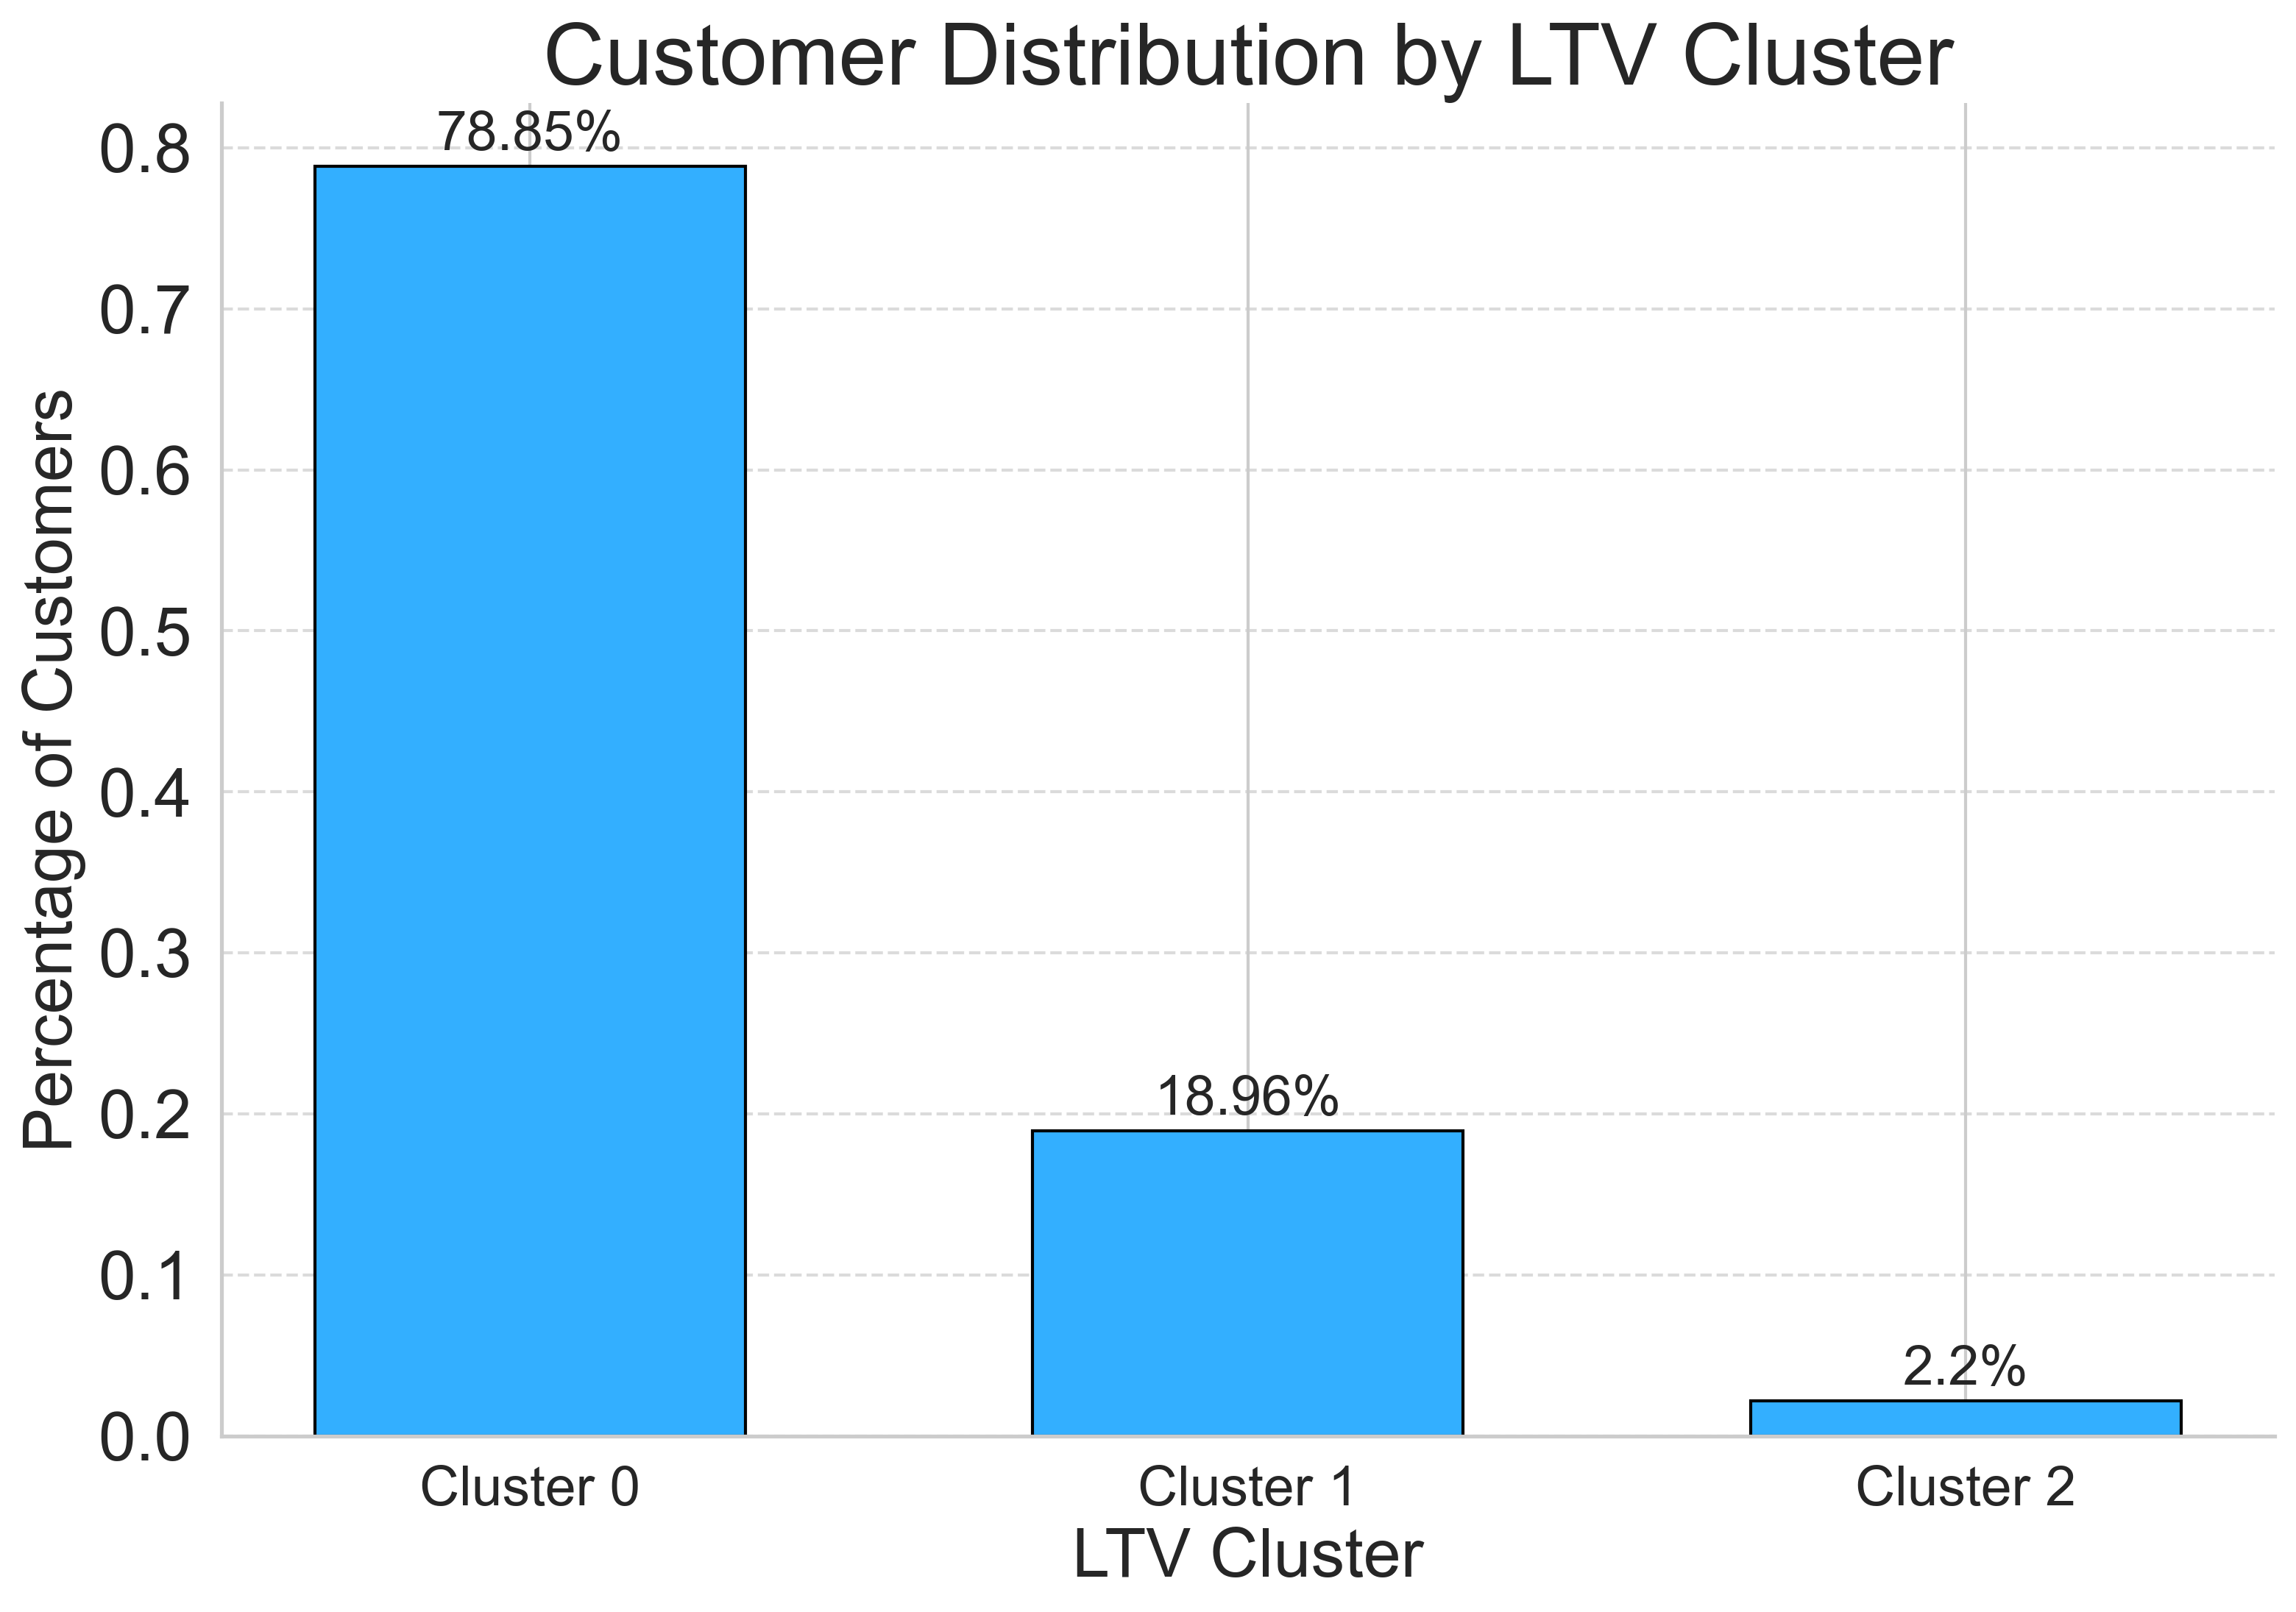

In [113]:
import matplotlib.pyplot as plt

# Calculate the percentage of customers in each LTVCluster
ltv_cluster_perc = df_class.groupby('LTVCluster').CustomerID.count()/df_class.CustomerID.count()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12,8), dpi=300)

# Plot the percentages as a bar chart with adjusted width
ax.bar(ltv_cluster_perc.index, ltv_cluster_perc.values, width=0.6, color='#33AFFF', edgecolor='black')

# Set the xticks and yticks font sizes
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Add labels and title to the plot
ax.set_xlabel('LTV Cluster', fontsize=22)
ax.set_ylabel('Percentage of Customers', fontsize=22)
ax.set_title('Customer Distribution by LTV Cluster', fontsize=28)

# Add grid lines and remove the top and right spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the x-axis tick labels to (0, 1, 2)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'], fontsize=18)

# Show the percentage value for each bar
for i, v in enumerate(ltv_cluster_perc.values):
    ax.text(i, v+0.01, str(round(v*100,2))+'%', ha='center', fontsize=18)

# Save and show the plot
plt.savefig('customer_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## SUPPORT VECTOR MACHINE (BASIC)

### SPLIT TRAIN, VALIDATION AND TEST SETS 


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


# Split data into 80% training, 10% validation, and 10% test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=26)

# create SVM classifier object
svm_model_split = SVC(kernel='rbf', C=0.1, random_state=24)

# train SVM classifier on the training data
svm_model_split.fit(X_train, y_train)

# predict the labels of validation and test data using trained SVM classifier
y_val_pred = svm_model_split.predict(X_val)
y_test_pred = svm_model_split.predict(X_test)

# compute the accuracy score of SVM classifier on validation and test set
val_accuracy = svm_model_split.score(X_val, y_val)
test_accuracy = svm_model_split.score(X_test, y_test)

print('Accuracy of SVM Classifier on training set: {:.2f}'.format(svm_model_split.score(X_train, y_train)))
print('Accuracy of SVM Classifier on validation set : {:.2f}'.format(val_accuracy))
print('Accuracy of SVM Classifier on test set : {:.2f}'.format(test_accuracy))


Accuracy of SVM Classifier on training set: 0.79
Accuracy of SVM Classifier on validation set : 0.76
Accuracy of SVM Classifier on test set : 0.84


### RESULT AFTER SPLIT TRAIN, VALIDATION AND TEST SETS 

In [115]:
from sklearn.metrics import classification_report

y_pred = svm_model_split.predict(X_test)
y_train_pred = svm_model_split.predict(X_train)

print("Classification Report of SVM model for Test Data:")
print(classification_report(y_test, y_pred))

print("Classification Report for Train Data:")
print(classification_report(y_train, y_train_pred))


Classification Report of SVM model for Test Data:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       153
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00         3

    accuracy                           0.84       182
   macro avg       0.28      0.33      0.30       182
weighted avg       0.71      0.84      0.77       182

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1126
           1       0.00      0.00      0.00       280
           2       0.00      0.00      0.00        27

    accuracy                           0.79      1433
   macro avg       0.26      0.33      0.29      1433
weighted avg       0.62      0.79      0.69      1433



C:\Users\Darius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

### GRIDCV FOR SVM MODEL

In [116]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# create SVM classifier object
svm_model = SVC(random_state=24)

# create GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1)

# fit GridSearchCV object to training data
grid_search.fit(X_trainval, y_trainval)

# print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# predict the labels of validation and test data using best SVM classifier
best_ltv_svm_model = grid_search.best_estimator_
y_val_pred = best_ltv_svm_model.predict(X_val)
y_test_pred = best_ltv_svm_model.predict(X_test)

# compute the accuracy score of best SVM classifier on validation and test set
val_accuracy = best_ltv_svm_model.score(X_val, y_val)
test_accuracy = best_ltv_svm_model.score(X_test, y_test)

print('Accuracy of best SVM Classifier on validation set : {:.2f}'.format(val_accuracy))
print('Accuracy of best SVM Classifier on test set : {:.2f}'.format(test_accuracy))


Best hyperparameters:  {'C': 10, 'kernel': 'linear'}
Accuracy of best SVM Classifier on validation set : 0.79
Accuracy of best SVM Classifier on test set : 0.86


### Result of SVM after using GridCV

In [117]:

# Split data into 80% training, 10% validation, and 10% test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=26)

# Fit the model with the best parameters
best_ltv_svm_model = SVC(kernel='linear', C=10, random_state=24)

# train SVM classifier on the training data
best_ltv_svm_model.fit(X_train, y_train)
                     
# Print the accuracies on the training, validation, and test sets
print('Accuracy of SVM Classifier on training set: {:.2f}'.format(best_ltv_svm_model.score(X_train, y_train)))
print('Accuracy of SVM Classifier on validation set : {:.2f}'.format(best_ltv_svm_model.score(X_val[X_train.columns], y_val)))
print('Accuracy of SVM Classifier on test set : {:.2f}'.format(best_ltv_svm_model.score(X_test[X_train.columns], y_test)))

Accuracy of SVM Classifier on training set: 0.81
Accuracy of SVM Classifier on validation set : 0.79
Accuracy of SVM Classifier on test set : 0.86


In [118]:
from sklearn.metrics import classification_report

y_pred = best_ltv_svm_model.predict(X_test)
y_train_pred = best_ltv_svm_model.predict(X_train)

print("Classification Report of SVM after-tunning parameter:")
print(classification_report(y_test, y_pred))

print("Classification Report for Train Data:")
print(classification_report(y_train, y_train_pred))

Classification Report of SVM after-tunning parameter:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       153
           1       0.50      0.12      0.19        26
           2       1.00      0.33      0.50         3

    accuracy                           0.86       182
   macro avg       0.79      0.48      0.54       182
weighted avg       0.82      0.86      0.81       182

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1126
           1       0.61      0.21      0.31       280
           2       0.67      0.30      0.41        27

    accuracy                           0.81      1433
   macro avg       0.70      0.49      0.54      1433
weighted avg       0.78      0.81      0.77      1433



## RANDOM FOREST

### SPLIT TRAIN-VALIDATION-TEST SET FOR RANDOM FOREST

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into 80% training, 10% validation, and 10% test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=26)

# create random forest classifier object
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=24)

# train random forest classifier on the training data
rf_model.fit(X_train, y_train)

# predict the labels of validation and test data using trained random forest classifier
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# compute the accuracy score of random forest classifier on validation and test set
val_accuracy = rf_model.score(X_val, y_val)
test_accuracy = rf_model.score(X_test, y_test)

print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(rf_model.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on validation set : {:.2f}'.format(val_accuracy))
print('Accuracy of Random Forest Classifier on test set : {:.2f}'.format(test_accuracy))


Accuracy of Random Forest Classifier on training set: 0.83
Accuracy of Random Forest Classifier on validation set : 0.79
Accuracy of Random Forest Classifier on test set : 0.87


### RESULT RANDOM FOREST AFTER USING SPLIT SETS

In [120]:
y_pred = rf_model.predict(X_test)
print("Classification Report of Random Forest:")
print(classification_report(y_test, y_pred))

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       153
           1       0.60      0.23      0.33        26
           2       1.00      0.33      0.50         3

    accuracy                           0.87       182
   macro avg       0.83      0.52      0.59       182
weighted avg       0.84      0.87      0.84       182



### GRIDCV FOR RANDOM FOREST MODEL

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5,7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# create random forest classifier object
rf_model = RandomForestClassifier(random_state=24)

# create GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=3, n_jobs=-1)

# fit GridSearchCV object to training data
grid_search.fit(X_trainval, y_trainval)

# print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)



Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [122]:
best_ltv_rf_model = RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100)
best_ltv_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=10)

### RESULT AFTERING USING GRIDCV

In [123]:
y_pred = best_ltv_rf_model.predict(X_test)
print("Classification Report of Random Forest after tunning parameter:")
print(classification_report(y_test, y_pred))

Classification Report of Random Forest after tunning parameter:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       153
           1       0.71      0.19      0.30        26
           2       0.00      0.00      0.00         3

    accuracy                           0.87       182
   macro avg       0.53      0.40      0.41       182
weighted avg       0.84      0.87      0.83       182



C:\Users\Darius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Darius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## COMPARISION BETWEEN 3 MODELS

### CONFUSION MATRICES

C:\Users\Darius\AppData\Local\Temp\ipykernel_14036\2038488195.py:25: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\Darius\AppData\Local\Temp\ipykernel_14036\2038488195.py:29: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



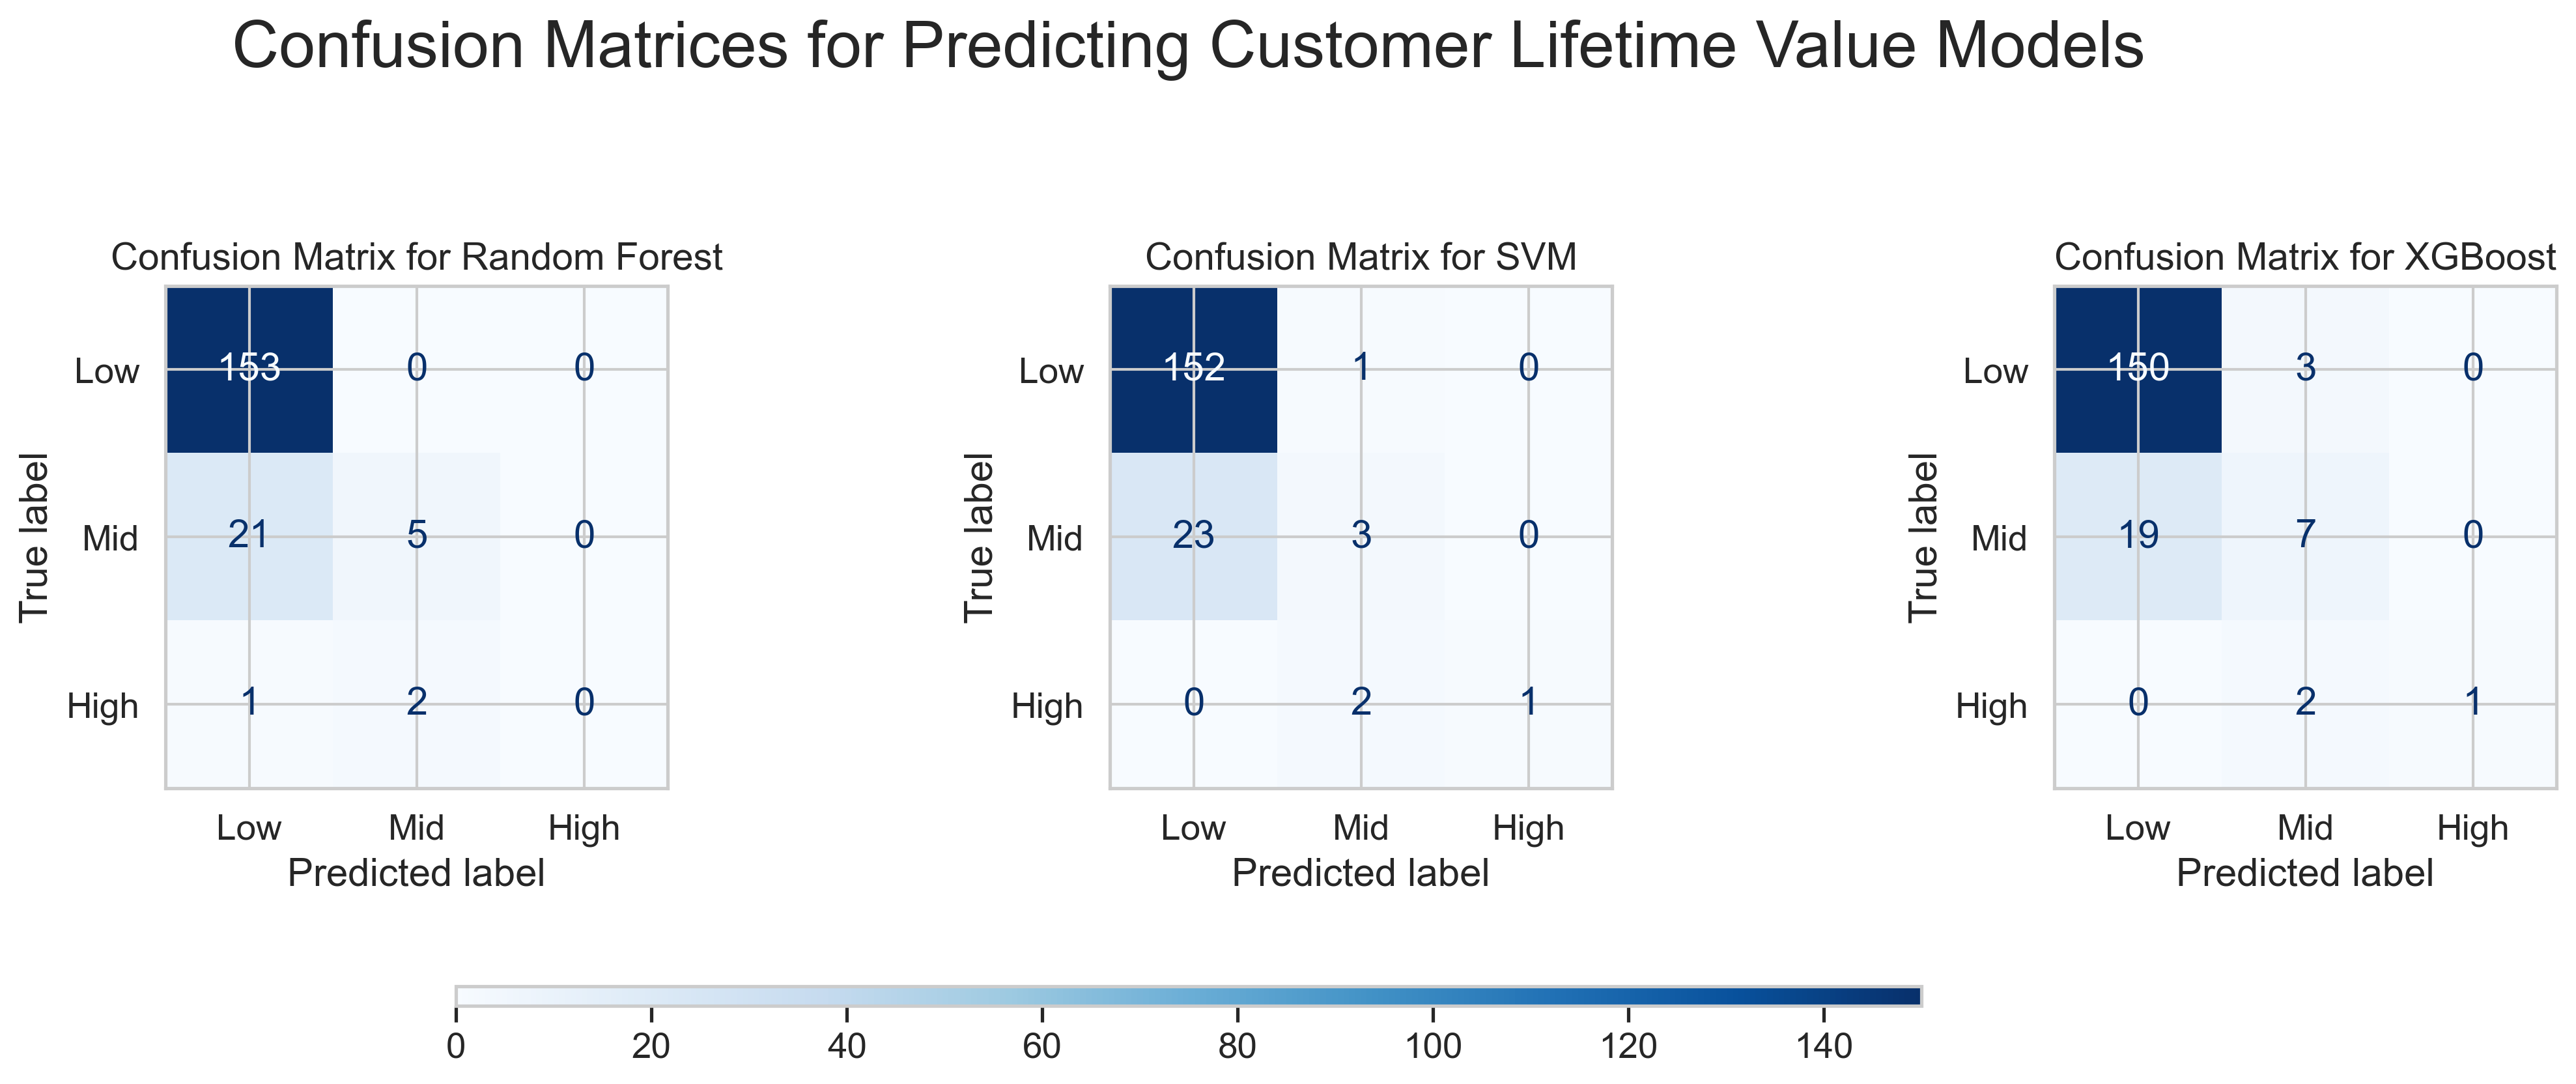

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Set the DPI for the plot
plt.rcParams['figure.dpi'] = 300

# create a list of models and their names
models = [('Random Forest', best_ltv_rf_model),('SVM', best_ltv_svm_model),('XGBoost', best_ltv_xgb_model)]

# loop through each model and plot its confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Mid', 'High'])
    disp.plot(cmap=plt.cm.Blues, ax=axes[i])
    disp.ax_.set_title('Confusion Matrix for {}'.format(name), fontsize=14)
    disp.im_.colorbar.remove()

# Add a common colorbar for all subplots
fig.subplots_adjust(wspace=0.3, top=0.8)
cbar_ax = fig.add_axes([0.25, -0.03, 0.5, 0.02])
fig.colorbar(disp.im_, cax=cbar_ax, orientation='horizontal')

# Add a title and adjust spacing
fig.suptitle('Confusion Matrices for Predicting Customer Lifetime Value Models', fontsize=24, y=0.98)
fig.tight_layout(pad=2.5)
plt.show()


### ROC CURVE


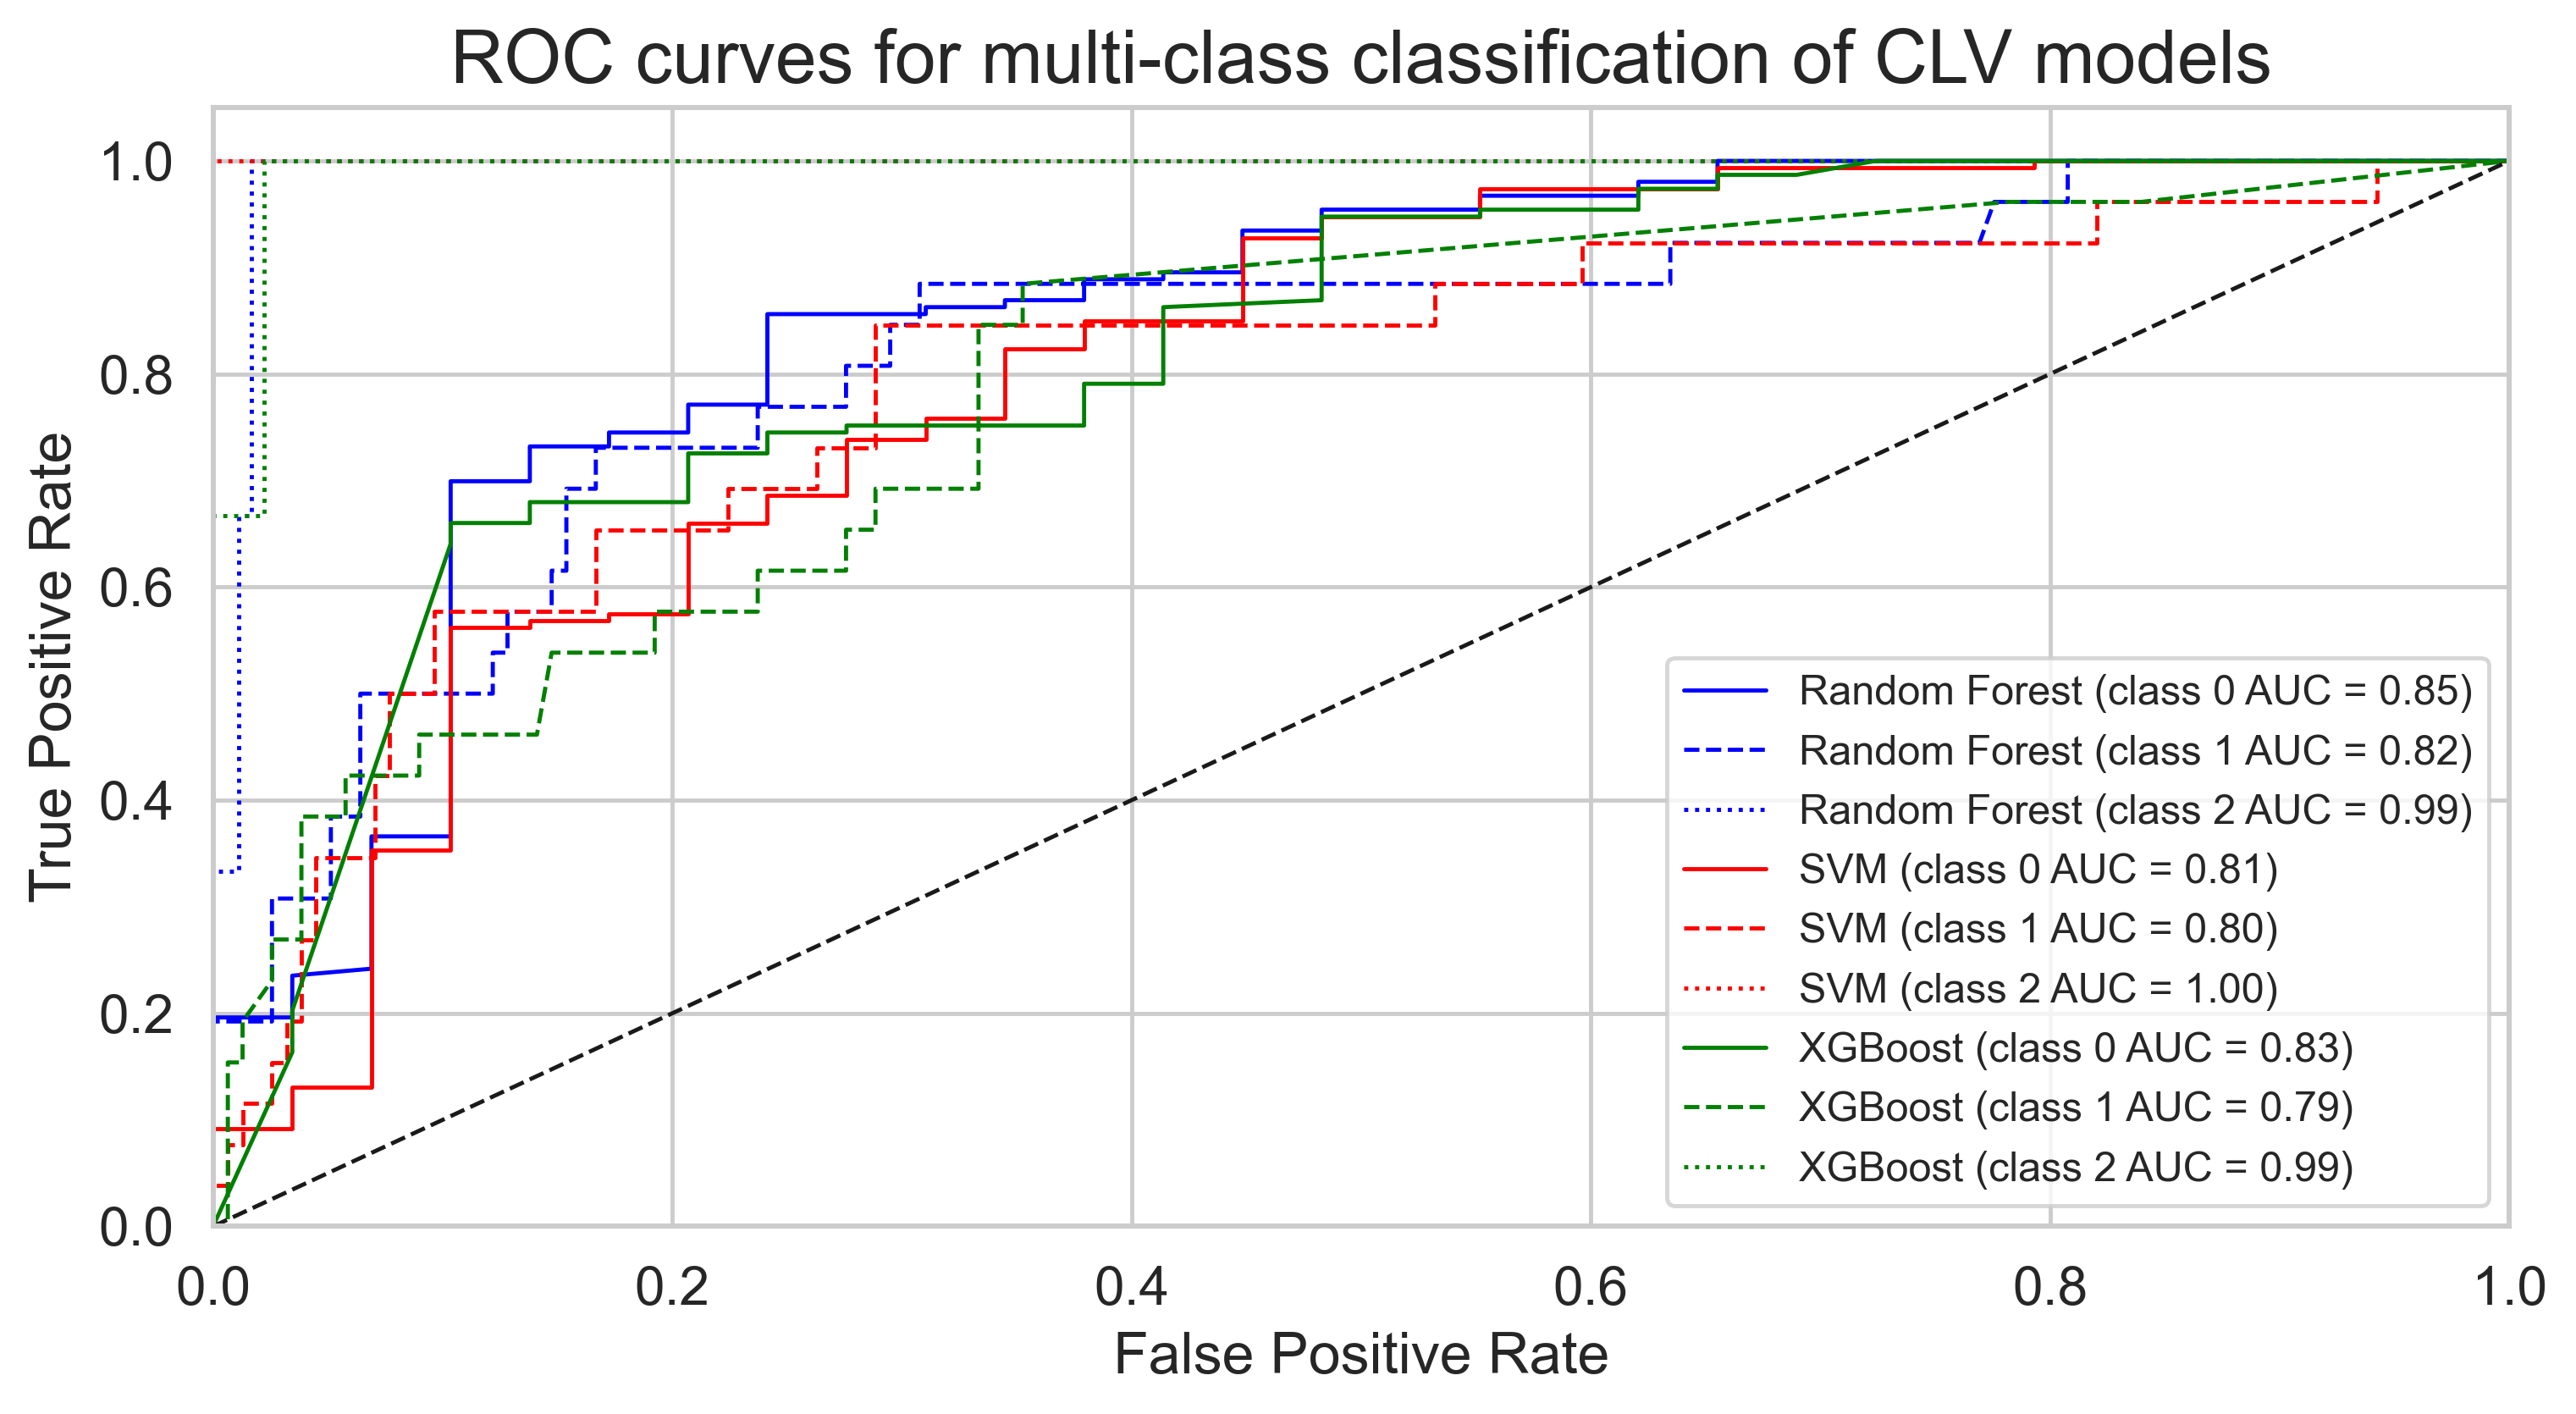

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Convert y_test to binary format
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binary.shape[1]

# Compute ROC curve and ROC area for each class for Random Forest model
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
y_score_rf = best_ltv_rf_model.predict_proba(X_test)
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binary[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Compute ROC curve and ROC area for each class for SVM model
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
y_score_svm = best_ltv_svm_model.decision_function(X_test)
for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_binary[:, i], y_score_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Compute ROC curve and ROC area for each class for XGBoost model
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
y_score_xgb = best_ltv_xgb_model.predict_proba(X_test)
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_binary[:, i], y_score_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plot ROC curves for each class for all models
plt.figure(figsize=(10,5), dpi=350)

# Define colors and linestyles for each model
colors = ['blue', 'red', 'green']
linestyles = ['-', '--', ':']

for model, color in zip([best_ltv_rf_model, best_ltv_svm_model, best_ltv_xgb_model], colors):
    for i, linestyle in zip(range(n_classes), linestyles):
        if model == best_ltv_rf_model:
            fpr = fpr_rf[i]
            tpr = tpr_rf[i]
            roc_auc = roc_auc_rf[i]
            label = 'Random Forest (class {0} AUC = {1:0.2f})'.format(i, roc_auc)
        elif model == best_ltv_svm_model:
            fpr = fpr_svm[i]
            tpr = tpr_svm[i]
            roc_auc = roc_auc_svm[i]
            label = 'SVM (class {0} AUC = {1:0.2f})'.format(i, roc_auc)
        else:
            fpr = fpr_xgb[i]
            tpr = tpr_xgb[i]
            roc_auc = roc_auc_xgb[i]
            label = 'XGBoost (class {0} AUC = {1:0.2f})'.format(i, roc_auc)
        plt.plot(fpr, tpr, color=color, lw=1, linestyle=linestyle, label=label)

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size =14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC curves for multi-class classification of CLV models', size = 18)
plt.legend(loc="lower right", prop={"size": 10})
plt.show()


In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = best_ltv_xgb_model.predict(X_test)

# Calculate assessment scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print out the scores
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))



Accuracy: 0.868
Precision: 0.846
Recall: 0.868
F1 Score: 0.844
